# Projet 2: Analyse des données de systèmes éducatifs
            Date cible de la soutenance : 02/12/2020

### Problématique:
    
Academy, la startup pour la quelle je travaille en tant que data scientist, veut lancer un projet d'expanssion à l'international.

### Mission:

La mission consiste à mener une analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer ce projet et cela suivant ces 4 points:

1. Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
    
2. Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
    
3. Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
    
4. Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

### Compétences techiques developpées:

1. Utiliser un notebook Jupyter pour faciliter la rédaction du code et la collaboration

2. Maîtriser les opérations fondamentales du langage Python pour la Data Science

3. Mettre en place un environnement Python

4. Manipuler des données avec des librairies Python spécialisées

5. Effectuer une représentation graphique à l'aide d'une librairie Python adaptée


## Feuille de route
1. Description des données

    1.a Données des pays/région sur le fichier: EdStatsCountry
    
    1.b Informations sur la source de data et la méthode de calcul des prédictions sur le fichier: StatsCountry_Series
    
    1.c Indicateurs par pays/région entre 1970 et 2100 sur le fichier: StatsData
    
    1.d Données et estimations par pays/région entre 1970 et 2050 sur le fichier: StatsFootNote
    
    1.e Informations sur les indicateurs avec les données annuelles par pays/région sur le fichier: EdStatsSeries
    

2. Selection d'indicateurs pertinents

    2.a L'indicateur : Population 15-24 ans
    
    2.b L'indicateur Internet Users
    
    2.c L'indicateur % des dépenses du gouvernement pour l'éducation
    
    2.d L'indicateur projection du % PIB /habitant
    
    2.e L'indicateur % des personnes qui ont un PC personnel 
    
    2.f L'indicateur Nombre de client potentiel
    
    
3. Proposition d'une métrique pour choisir les pays avec un fort potentiel
4. Focus sur les pays choisis
5. Conclusion

In [1]:
# import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re
import numpy as np
from datetime import datetime

In [2]:
#pip install plotly

# 1 . Déscription des données de la banque monadiale

## 1.a le fichier EdStatsCountry

In [3]:
#import du dataset Country:
Country = pd.read_csv("C:/Users/atahri/Desktop/OC_Asma/P02/Data/EdStatsCountry.csv")

#affichage 5 lignes du fichier:
Country.head(2)

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   

            IMF data dissemination standard  Latest population census  \
0                                       NaN                      2010   
1  General Data Dissemination System (GDDS)                      1979   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1           Integrated household survey (IHS), 2008   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   

  Unnamed: 31  
0         NaN  
1         NaN  

[2 rows x 32 columns]

In [4]:
#Information sur Country: 241 lignes, 32 colonnes
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [5]:
# Le nombre de valeurs manquantes
Country["Region"].isna().sum()

27

In [6]:
# On affiche les valeurs pour chaque région:
Country["Region"].value_counts(normalize = False , dropna = False)

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
NaN                           27
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

Text(0.5, 1.0, 'Distribution des pays par région')

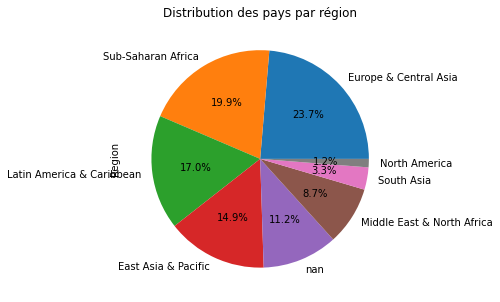

In [7]:
# Une autre manière de voir ces statistiques
fig = Country["Region"].value_counts(normalize = False , dropna = False)
plot = fig.plot.pie(figsize=(5, 5), autopct='%1.1f%%')
plot.set_title("Distribution des pays par région")

les 3 régions Europe et asie centrale, Afrique subsaharienne et Amérique latine contiennent plus de 50% des pays du monde.

Text(0.5, 1.0, 'Distribution des pays par groupe de revenu')

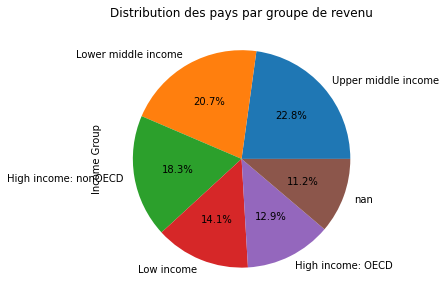

In [8]:
fig = Country["Income Group"].value_counts(normalize = False , dropna = False)
plot = fig.plot.pie(figsize=(5, 5), autopct='%1.1f%%')
plot.set_title("Distribution des pays par groupe de revenu")

5 groupes de revenu, les valeurs manquantes pour cette information représentent 11,2%

In [9]:
# taille du dataset Country
print("La taille du fichier Country: ",Country.size)

# total des Nan dans le fichier:
print("Le nombre total des NAN: ", Country.isna().sum().sum())

# Le pourcentage des valeurs manquantes:
print("le fichier comporte", 100*float(Country.isna().sum().sum())//float(Country.size),"% de valeurs manquantes")


La taille du fichier Country:  7712
Le nombre total des NAN:  2354
le fichier comporte 30.0 % de valeurs manquantes


In [10]:
# fonction permettant de décrire un fichier en entrée
def decrire_dataset(fichier):
    Nb_Ligne = fichier.shape[0]
    Nb_Colonne = fichier.shape[1]
    Taille = fichier.size
    Pct_Nan = 100*float(fichier.isna().sum().sum())// Taille
    print ("Le fichier est de taille {}. Il contient {} colonnes et {} lignes et il est composé de {} % valeurs manquantes".format(Taille, Nb_Colonne, Nb_Ligne, Pct_Nan))

In [11]:
decrire_dataset(Country)

Le fichier est de taille 7712. Il contient 32 colonnes et 241 lignes et il est composé de 30.0 % valeurs manquantes


Le fichier EdStatsCountry contient une liste de pays, groupe de pays et régions. Le fichier contient des information d'ordre générales sur les pays comme la devise, la région, la population, ainsi que des données économiques comme le groupe de revenu.


##  1.b Le fichier EdStatsCountry-Series

In [12]:
Country_Series = pd.read_csv("C:/Users/atahri/Desktop/OC_Asma/P02/Data/EdStatsCountry-Series.csv")

#affichage 5 lignes du fichier:
Country_Series.sample(5)

CountryCode         SeriesCode  \
26          ARM        SP.POP.GROW   
323         MAR  SP.POP.TOTL.MA.ZS   
432         PRI  NY.GDP.PCAP.PP.KD   
608         ZAF        SP.POP.GROW   
20          ARG  NY.GDP.PCAP.PP.CD   

                                           DESCRIPTION  Unnamed: 3  
26   Data sources: United Nations World Population ...         NaN  
323    Morocco only. (Excluding former Spanish Sahara)         NaN  
432                 Estimates are based on regression.         NaN  
608  Data sources : Statistics South Africa, United...         NaN  
20                  Estimates are based on regression.         NaN

In [13]:
#Information sur Country_Series: 613 lignes, 4 colonnes
Country_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [14]:
# nous supprimons la dernière colonne qui est une colonne vide:
del Country_Series["Unnamed: 3"]

In [15]:
#la colonne "DESCRIPTION contient des informations sur la source de data, 
#ou la méthode de calcul de l'estimation des données
Country_Series["DESCRIPTION"].sample(5)

323      Morocco only. (Excluding former Spanish Sahara)
175    Data sources : United Nations World Population...
385    Data sources : United Nations World Population...
339    Derived using ratio of age group from WPP and ...
572    Data sources: United Nations World Population ...
Name: DESCRIPTION, dtype: object

In [16]:
#la colonne "CountryCode" contient 211 valeurs unique parmi les 613 valeurs présentent dans la colonne:
#la source la plus utilisée est les données des nations unies
Country_Series.describe()


CountryCode   SeriesCode  \
count          613          613   
unique         211           21   
top            MDA  SP.POP.GROW   
freq            18          211   

                                              DESCRIPTION  
count                                                 613  
unique                                                 97  
top     Data sources : United Nations World Population...  
freq                                                  154

In [17]:
decrire_dataset(Country_Series)

Le fichier est de taille 1839. Il contient 3 colonnes et 613 lignes et il est composé de 0.0 % valeurs manquantes


Le fichier EdStatsCountry-Series donne comme information la source des données qui sont au nombre de 97. La source la plus utilisée est les données des nations unies.

## 1.c Le fichier EdStatsData

In [18]:
Data = pd.read_csv("C:/Users/atahri/Desktop/OC_Asma/P02/Data/EdStatsData.csv")

#affichage 2 lignes du fichier:
Data.sample(2)

Country Name Country Code  \
747603                                              Spain          ESP   
39355   Latin America & Caribbean (excluding high income)          LAC   

                                           Indicator Name  \
747603  Wittgenstein Projection: Population age 20-24 ...   
39355   SABER: (Engaging the Private Sector, Governmen...   

               Indicator Code  1970  1971  1972  1973  1974  1975  ...  \
747603      PRJ.POP.2024.2.MF   NaN   NaN   NaN   NaN   NaN   NaN  ...   
39355   SABER.GRVT.GOAL6.LVL1   NaN   NaN   NaN   NaN   NaN   NaN  ...   

          2060    2065    2070   2075    2080    2085    2090    2095   2100  \
747603  281.92  261.47  236.07  212.8  195.49  185.34  177.22  167.06  154.3   
39355      NaN     NaN     NaN    NaN     NaN     NaN     NaN     NaN    NaN   

        Unnamed: 69  
747603          NaN  
39355           NaN  

[2 rows x 70 columns]

In [19]:
#le fichier contient 3665 indicateurs pour 242 pays.

print('Nombre d\'indicateurs',len(Data["Indicator Name"].unique()))
print('Nombre de pays:',len(Data["Country Name"].unique()))
Data[Data['Indicator Name'].str.contains('GDP',case=True)]


Nombre d'indicateurs 3665
Nombre de pays: 242


Country Name Country Code  \
1242     Arab World          ARB   
1243     Arab World          ARB   
1244     Arab World          ARB   
1245     Arab World          ARB   
1246     Arab World          ARB   
...             ...          ...   
884541     Zimbabwe          ZWE   
884546     Zimbabwe          ZWE   
884551     Zimbabwe          ZWE   
884556     Zimbabwe          ZWE   
884561     Zimbabwe          ZWE   

                                           Indicator Name  \
1242             GDP at market prices (constant 2005 US$)   
1243                   GDP at market prices (current US$)   
1244                   GDP per capita (constant 2005 US$)   
1245                         GDP per capita (current US$)   
1246    GDP per capita, PPP (constant 2011 internation...   
...                                                   ...   
884541  Government expenditure per post-secondary non-...   
884546  Government expenditure per primary student as ...   
884551  Government expenditure per secondary student a...   
884556  Government expenditure per tertiary student as...   
884561  Government expenditure per upper secondary stu...   

                  Indicator Code          1970          1971          1972  \
1242              NY.GDP.MKTP.KD           NaN           NaN           NaN   
1243              NY.GDP.MKTP.CD  3.091053e+10  3.589492e+10  4.276150e+10   
1244              NY.GDP.PCAP.KD           NaN           NaN           NaN   
1245              NY.GDP.PCAP.CD  2.504886e+02  2.832480e+02  3.286929e+02   
1246           NY.GDP.PCAP.PP.KD           NaN           NaN           NaN   
...                          ...           ...           ...           ...   
884541  UIS.XUNIT.GDPCAP.4.FSGOV           NaN           NaN           NaN   
884546         SE.XPD.PRIM.PC.ZS           NaN           NaN           NaN   
884551         SE.XPD.SECO.PC.ZS           NaN           NaN           NaN   
884556         SE.XPD.TERT.PC.ZS           NaN           NaN           NaN   
884561  UIS.XUNIT.GDPCAP.3.FSGOV           NaN           NaN           NaN   

                1973          1974          1975  ...  2060  2065  2070  2075  \
1242             NaN           NaN  3.685920e+11  ...   NaN   NaN   NaN   NaN   
1243    5.434601e+10  1.041715e+11  1.155599e+11  ...   NaN   NaN   NaN   NaN   
1244             NaN           NaN  2.607173e+03  ...   NaN   NaN   NaN   NaN   
1245    4.068046e+02  7.585630e+02  8.173936e+02  ...   NaN   NaN   NaN   NaN   
1246             NaN           NaN           NaN  ...   NaN   NaN   NaN   NaN   
...              ...           ...           ...  ...   ...   ...   ...   ...   
884541           NaN           NaN           NaN  ...   NaN   NaN   NaN   NaN   
884546           NaN           NaN           NaN  ...   NaN   NaN   NaN   NaN   
884551           NaN           NaN           NaN  ...   NaN   NaN   NaN   NaN   
884556           NaN           NaN           NaN  ...   NaN   NaN   NaN   NaN   
884561           NaN           NaN           NaN  ...   NaN   NaN   NaN   NaN   

        2080  2085  2090  2095  2100  Unnamed: 69  
1242     NaN   NaN   NaN   NaN   NaN          NaN  
1243     NaN   NaN   NaN   NaN   NaN          NaN  
1244     NaN   NaN   NaN   NaN   NaN          NaN  
1245     NaN   NaN   NaN   NaN   NaN          NaN  
1246     NaN   NaN   NaN   NaN   NaN          NaN  
...      ...   ...   ...   ...   ...          ...  
884541   NaN   NaN   NaN   NaN   NaN          NaN  
884546   NaN   NaN   NaN   NaN   NaN          NaN  
884551   NaN   NaN   NaN   NaN   NaN          NaN  
884556   NaN   NaN   NaN   NaN   NaN          NaN  
884561   NaN   NaN   NaN   NaN   NaN          NaN  

[6534 rows x 70 columns]

In [20]:
decrire_dataset(Data)

Le fichier est de taille 62085100. Il contient 70 colonnes et 886930 lignes et il est composé de 86.0 % valeurs manquantes


Le fichier EdStatsData nous donne l'ensemble des indicateurs qui sont au nombre de 3665, pour l'ensemble des pays, région et groupe de pays (au nombre de 242) et cela sur une période qui s'étale entre 1970 et 2100.


### 1.d Le fichier EdStatsFootNote

In [21]:
FootNote = pd.read_csv("C:/Users/atahri/Desktop/OC_Asma/P02/Data/EdStatsFootNote.csv")

#affichage 5 lignes du fichier:
FootNote.sample(2)

CountryCode         SeriesCode    Year  \
116178         CRI  SE.PRM.TCAQ.FE.ZS  YR2006   
12080          ARB        SE.TER.ENRL  YR1980   

                                           DESCRIPTION  Unnamed: 4  
116178                             National Estimation         NaN  
12080   UNESCO Institute for Statistics (UIS) estimate         NaN

In [22]:
# Ce fichier contient 5 colonnes et 643638 lignes, la dernière colonne ne contient aucune information.
FootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [23]:
# nous supprimons la dernière colonne:
del(FootNote['Unnamed: 4'])

In [138]:
# le fichier contient 239 codes pays différents
print('Nombre de pays:' , len(FootNote['CountryCode'].unique()))

Nombre de pays: 239


In [25]:
# mettre tous les yr devant les années en minuscule  
def lower_case(value):
    return value.lower()

FootNote["Year"]=FootNote['Year'].apply(lower_case)

# supprimer les 'yr' pour avoir les années en type int:
def convert_year(year):
    found= re.search("yr\d{4}",year)
    if found is None:
        print('.{} n\'est pas au bon fon format . il sera ignoré.' .format(year))
        return np.NaN
    else:
        value= year[2:]
        return int(value)

FootNote['Year'] = [convert_year(t) for t in FootNote['Year']]
FootNote

CountryCode      SeriesCode  Year  \
0              ABW  SE.PRE.ENRL.FE  2001   
1              ABW  SE.TER.TCHR.FE  2005   
2              ABW  SE.PRE.TCHR.FE  2000   
3              ABW  SE.SEC.ENRL.GC  2004   
4              ABW     SE.PRE.TCHR  2006   
...            ...             ...   ...   
643633         ZWE     SH.DYN.MORT  2007   
643634         ZWE     SH.DYN.MORT  2014   
643635         ZWE     SH.DYN.MORT  2015   
643636         ZWE     SH.DYN.MORT  2017   
643637         ZWE     SP.POP.GROW  2017   

                                   DESCRIPTION  
0                          Country estimation.  
1                          Country estimation.  
2                          Country estimation.  
3                          Country estimation.  
4                          Country estimation.  
...                                        ...  
643633       Uncertainty bound is 91.6 - 109.3  
643634          Uncertainty bound is 54.3 - 76  
643635        Uncertainty bound is 48.3 - 73.3  
643636  5-year average value between 0s and 5s  
643637  5-year average value between 0s and 5s  

[643638 rows x 4 columns]

In [139]:
print('les données sont entre:', FootNote['Year'].min(), 'et ' , FootNote['Year'].max())

les données sont entre: 1970 et  2050


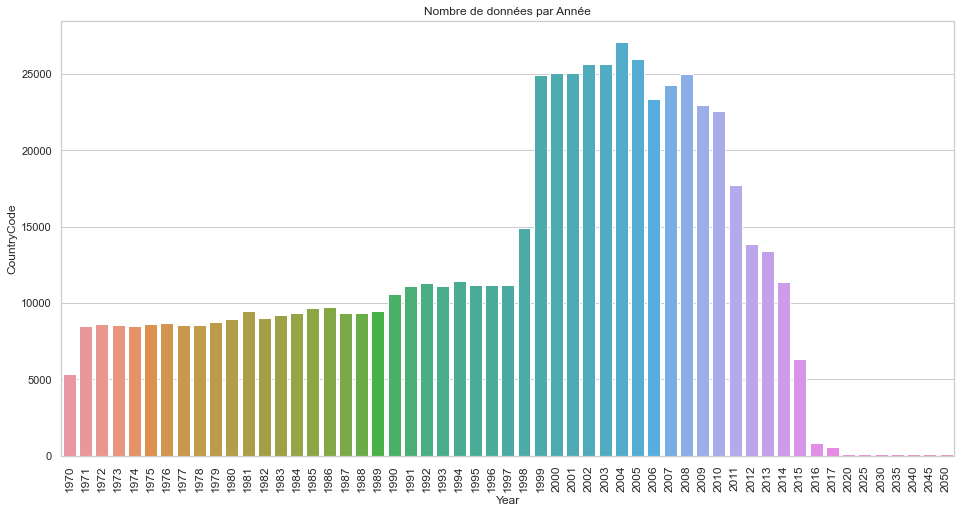

In [144]:

plt.figure(figsize=(16, 8))
plt.title('Nombre de données par Année')
plot = sns.barplot(y = 'CountryCode', x='Year', data = FootNote.groupby('Year').count().reset_index())
plot.set_xticklabels(labels = FootNote.groupby('Year').count().reset_index()['Year'], rotation=90, size=12)

plt.show()

Les données pour des prédictions sont absentes, en effet, pas de données après l'année 2017

In [26]:
decrire_dataset(FootNote)

Le fichier est de taille 2574552. Il contient 4 colonnes et 643638 lignes et il est composé de 0.0 % valeurs manquantes


Le fichier EdStatsFootNote nous fournie une description sur les données pour chaque pays, si c'est une estimation ou bien des données de l'unesco ou des données officielles du pays.

### 1.e Le fichier EdStatsSeries

In [27]:
Series = pd.read_csv("C:/Users/atahri/Desktop/OC_Asma/P02/Data/EdStatsSeries.csv")

#affichage 2 lignes du fichier:
Series.sample(2)

Series Code               Topic  \
669  LO.EGRA.CWPM.ARB.2GRD   Learning Outcomes   
405        HH.DHS.OOS.1.Q3  Education Equality   

                                        Indicator Name  \
669  EGRA: Correct Isolated Words Read Per Minute (...   
405  DHS: Proportion of out-of-school. Primary. Qui...   

                                      Short definition  \
669  Average total number of familiar words correct...   
405  Proportion of out-of-school. Primary. Quintile...   

                                       Long definition  Unit of measure  \
669  Average total number of familiar words correct...              NaN   
405  Proportion of out-of-school. Primary. Quintile...              NaN   

    Periodicity Base Period Other notes Aggregation method  ...  \
669         NaN         NaN        EGRA                NaN  ...   
405         NaN         NaN         NaN                NaN  ...   

    Notes from original source  General comments  \
669                        NaN               NaN   
405                        NaN               NaN   

                                                Source  \
669  Early Grade Reading Assessment (EGRA): https:/...   
405               Demographic and Health Surveys (DHS)   

    Statistical concept and methodology Development relevance  \
669                                 NaN                   NaN   
405                                 NaN                   NaN   

    Related source links Other web links  Related indicators  License Type  \
669                  NaN             NaN                 NaN           NaN   
405                  NaN             NaN                 NaN           NaN   

     Unnamed: 20  
669          NaN  
405          NaN  

[2 rows x 21 columns]

In [28]:
#Ce fichier contient 3665 ligne et 21 colonnes dont 6 vides'
Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [29]:
#Nous supprimons les colonnes vides:
del(Series['Unit of measure'],Series['Notes from original source'],Series['Other web links'],
    Series['Related indicators'],Series['License Type'],Series['Unnamed: 20'])

In [30]:
#37 topic pour 3665 indicateurs 
Series.describe()

Series Code              Topic  \
count                 3665               3665   
unique                3665                 37   
top     LO.LLECE.SCI6.3.MA  Learning Outcomes   
freq                     1               1046   

                           Indicator Name  \
count                                3665   
unique                               3665   
top     Population ages 0-14 (% of total)   
freq                                    1   

                                         Short definition  \
count                                                2156   
unique                                               1169   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
freq                                                  215   

                                          Long definition Periodicity  \
count                                                3665          99   
unique                                               2060           1   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=E...      Annual   
freq                                                  215          99   

                       Base Period Other notes Aggregation method  \
count                          314         552                 47   
unique                           4          14                  3   
top     Projections (2010 to 2100)        EGRA   Weighted average   
freq                           308         403                 31   

                               Limitations and exceptions  \
count                                                  14   
unique                                                  9   
top     The criteria for people considered to be seeki...   
freq                                                    3   

                                         General comments  \
count                                                  14   
unique                                                  8   
top     Data up to 2016 are estimates while data from ...   
freq                                                    3   

                                 Source Statistical concept and methodology  \
count                              3665                                  23   
unique                               31                                   2   
top     UNESCO Institute for Statistics                               TIMSS   
freq                               1269                                  20   

                                    Development relevance  \
count                                                   3   
unique                                                  1   
top     Unemployment and total employment are the broa...   
freq                                                    3   

                        Related source links  
count                                    215  
unique                                     1  
top     http://saber.worldbank.org/index.cfm  
freq                                     215

In [31]:
#pour plus d'informations sur la colonne topic: 
Series["Topic"].value_counts(normalize = False , dropna = False)

Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                        

In [32]:
#Une autre maière de voir ces données:
topic= Series["Topic"].value_counts(normalize = False , dropna = False).sort_values()
topic.plot(kind='barh',figsize=(7,15))
plt.title('Nombre d\'indicateurs par topic',size=18)
plt.show()

Le topic "résultat d'apprentissage" contient plus de 1000 indicateurs suivi du "réalisation" avec plus de 700 indicateurs puis "qualité de l'éducation" qui contient 426 indicateurs. 

In [33]:
decrire_dataset(Series)

Le fichier est de taille 54975. Il contient 15 colonnes et 3665 lignes et il est composé de 60.0 % valeurs manquantes


Le fichier EdStatsSeries contient des informations sur l'ensemble des indicateurs (3665), comme les définitions, méthodes et fréquences des calculs et la source pour chaque indicateur, aussi Nous avons un regroupement des indicateurs par topic.

# 2. Selection d'indicateurs pertinents

###### Rappel du contexte:
    Academy est une startup qui opère dans le domaine du e-learning, elle propose des contenus de formation en ligne pour un public de niveau lycée et université.
    Pour une expansion à l’international de l’entreprise, nous avons besoin d'étudier le potentiel des pays au niveau  démographique, technologique et économique.
        
##### Choix des Indicateurs:
    1. Au miveau démographique:
       Academy vise les lycéens et étudiants d'université, c'est une population qui correspond à une tranche d'age entre 15 et 24 ans. il est donc pertinent de prendre l'indicateur population 15_24 ans, ainsi que l'indicateur qui nous donne le nombre totatl des élèves (lycée + université), d'où le choix des indicateur:
       . Population, ages 15-24, total
       . Enrolment in upper secondary education, both sexes (number)
       . Enrolment in tertiary education, all programmes, both sexes (number)
       
     2. Au niveau technologique:
        Le produit proposé par Academy est une formation une ligne, donc l'utilisation d'internet et d'ordinateur personnel est indisponsable:
        . Internet users (per 100 people)
        . Personal computers (per 100 people)
        
     3. Au niveau économique:
         Pour financer ces formations en ligne, nous avons besoin d'avoir une idée sur le niveau de vie de la population cible, et à quel point les gouvernements interviennent dans le domaine de l'éducation, pour cela nous avons choisi deux indicateur:
         . Expenditure on education as % of total government expenditure (%)
         . GDP per capita (constant 2005 US$)
        
       
    


#### Extracteur d'indicateurs

In [34]:
# Création de deux liste: pays valide et région valide

PaysValide = Country[Country['Country Code'].isin(Country_Series["CountryCode"].unique().tolist())]['Short Name'].dropna().unique().tolist()

RegionValide= Country['Region'].dropna().unique().tolist()


In [35]:
#la liste des pays valides contient 211 pays 
print(len(PaysValide))


211


In [36]:
#7 régions:
print(RegionValide)

['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific', 'North America']


In [37]:
# une liste des années:
annees = list(map(str,range(1970,2100,1)))


In [38]:
# fonction permettant de recupérer un indicateur pour un niveau donnée (Pays, Region, indicateur)
def recup_indicateur(dataset,niveau,indicateur):
    
    if niveau == 'Region':
        checklist = RegionValide
        
    else:
        checklist = PaysValide
        
    
    tab = dataset[dataset['Country Name'].isin(checklist)]
    ColonneAnnee = [yy for yy in annees if yy in dataset.columns]
    
    tab = tab.loc[tab['Indicator Name'] == indicateur].dropna(how='all', subset=ColonneAnnee).dropna(axis=1,
            how='all')
    newTab = tab
    if (not tab.empty):
        tab=tab.drop(['Indicator Code'],axis=1)
        tab1 = Country[['Country Code','Region', 'Income Group']]
        newTab = tab1.merge(tab,on='Country Code')
    
    return newTab


### 2.a L'indicateur : Population 15-24 ans:

In [39]:
Pop15_24_Country = recup_indicateur(Data, 'Pays' ,'Population, ages 15-24, total')
Pop15_24_Country.sample(2)

Country Code                 Region          Income Group   Country Name  \
71          HUN  Europe & Central Asia   Upper middle income        Hungary   
94          LIE  Europe & Central Asia  High income: nonOECD  Liechtenstein   

                   Indicator Name       1990       1991       1992       1993  \
71  Population, ages 15-24, total  1478460.0  1518077.0  1558849.0  1595764.0   
94  Population, ages 15-24, total        NaN        NaN        NaN        NaN   

         1994  ...       2006       2007       2008       2009       2010  \
71  1622566.0  ...  1268838.0  1259370.0  1255858.0  1251656.0  1241953.0   
94        NaN  ...        NaN        NaN        NaN        NaN        NaN   

         2011       2012       2013       2014       2015  
71  1225523.0  1203884.0  1178293.0  1150972.0  1123703.0  
94        NaN        NaN        NaN        NaN        NaN  

[2 rows x 31 columns]

In [40]:
#graphe pour comparer l'évolution de la population 15-24 entre l'année 1990 et 2016
fig = plt.figure(figsize=(12, 7))
fig.suptitle("Evolution de la population 15-24 entre 1990 et 2016", fontsize  = 14)
Date_Deb = datetime.strptime('1990-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')


Chine = Pop15_24_Country[Pop15_24_Country['Country Code']=='CHN'].loc[:,'1990':'2015']
Inde = Pop15_24_Country[Pop15_24_Country['Country Code']=='IND'].loc[:,'1990':'2015']


plt.plot(annees_ref,Chine.T,linewidth = 3.0, label='Chine')
plt.plot(annees_ref,Inde.T,linewidth = 3.0, label='Inde')

plt.xlabel('Année')
plt.ylabel('Population 1524 (en 100 millions)')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

La population entre 15 et 24 ans en Inde est en augmentation forte continue depuis le début des années 90, par contre la population en Chine pour la même tranche d'âge est en diminution, mais les chiffres restent très élevés par rapport aux autres pays. on dessine les autres pays dans un graphe a prt pour mieux voir leurs tendances.

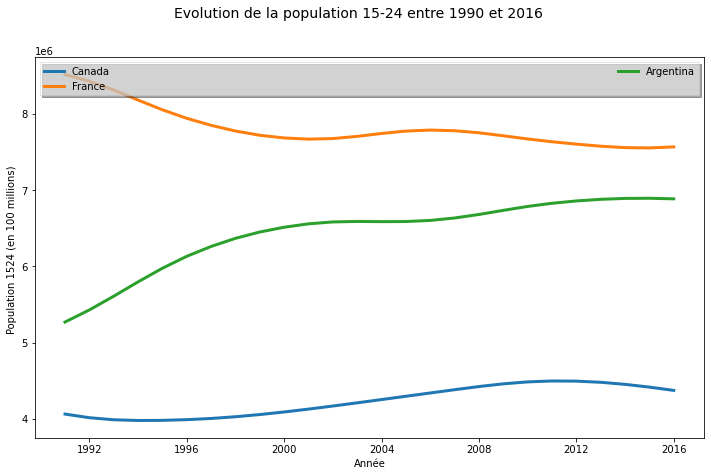

In [41]:
fig = plt.figure(figsize=(12, 7))
fig.suptitle("Evolution de la population 15-24 entre 1990 et 2016", fontsize  = 14)
Date_Deb = datetime.strptime('1990-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

Canada = Pop15_24_Country[Pop15_24_Country['Country Code']=='CAN'].loc[:,'1990':'2015']
France = Pop15_24_Country[Pop15_24_Country['Country Code']=='FRA'].loc[:,'1990':'2015']
Argentina= Pop15_24_Country[Pop15_24_Country['Country Code']=='ARG'].loc[:,'1990':'2015']

plt.plot(annees_ref,Canada.T,linewidth = 3.0, label='Canada')
plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')

plt.xlabel('Année')
plt.ylabel('Population 1524 (en 100 millions) ')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

La france a une dynamique baissière pour cette partie de la population, cette dynamique est haussière pour le canada et l'argentine

In [42]:
#calcul de la moyenne, médiane, ecart type, variance 
#ainsi que les indicateurs skewness et kuriosis pour la population 15_24:
Pop15_24_Country = Pop15_24_Country.dropna(how='any')

temp = Pop15_24_Country.drop(['Country Code','Region','Country Name','Indicator Name'],axis=1)
Pop15_24_Country['MEAN'] = temp.mean(axis=1)
Pop15_24_Country['MEDIAN'] = temp.median(axis=1)
Pop15_24_Country['STD'] = temp.std(axis=1)
Pop15_24_Country['VARIANCE'] = temp.var(axis=1)
Pop15_24_Country['CHANGE'] = 100.0 * ((temp['2015'] - temp['2000'])/temp['2000'])

Pop15_24_Country['SKEWNESS'] = temp.skew(axis=1)
Pop15_24_Country['KURTOSIS'] = temp.kurtosis(axis=1)

In [43]:
Pop15_24_Country.head(2)

Country Code                     Region          Income Group Country Name  \
0          ABW  Latin America & Caribbean  High income: nonOECD        Aruba   
1          AFG                 South Asia            Low income  Afghanistan   

                  Indicator Name       1990       1991       1992       1993  \
0  Population, ages 15-24, total     8604.0     9014.0     9377.0    10216.0   
1  Population, ages 15-24, total  2423555.0  2587510.0  2808220.0  3056374.0   

        1994  ...       2013       2014       2015          MEAN     MEDIAN  \
0    10267.0  ...    13990.0    14253.0    14455.0  1.194081e+04    11678.0   
1  3291124.0  ...  6803785.0  7032072.0  7252785.0  4.660579e+06  4389656.5   

            STD      VARIANCE     CHANGE  SKEWNESS  KURTOSIS  
0  1.661945e+03  2.762060e+06  28.169888 -0.330267 -0.849618  
1  1.433015e+06  2.053533e+12  82.256515  0.290311 -1.023012  

[2 rows x 38 columns]

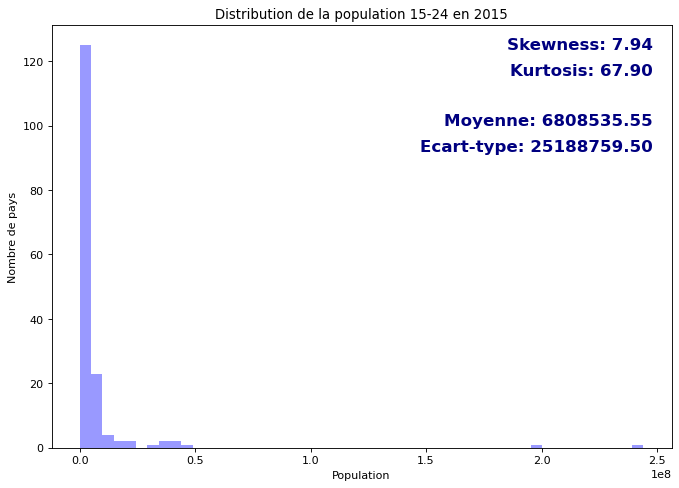

In [44]:
# On choisi l'année 2015 comme année de reférence:
data = Pop15_24_Country['2015']


fig = plt.figure(figsize=(10, 7), dpi= 80)

ax = sns.distplot(Pop15_24_Country['2015'],kde=False,color="blue")

ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % Pop15_24_Country['2015'].skew(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % Pop15_24_Country['2015'].kurt(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.79, transform=ax.transAxes, s="Moyenne: %.2f" % Pop15_24_Country['2015'].mean(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.73, transform=ax.transAxes, s="Ecart-type: %.2f" % Pop15_24_Country['2015'].std(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')


plt.xlabel('Population')
plt.ylabel('Nombre de pays')
plt.title('Distribution de la population 15-24 en 2015')
plt.show()

On remarque que la distribution de la population 15-24 en 2015 est asymétrique à droite et non aplatie (indicateur Skewness $8 et kurtosis 68)

#### Population 1524 par région géographique

In [45]:
#definir un dataframe avec les colonne 'annéesn' plus région pour regrouper les données par région:
Col_AgrG = list(map(str,range(1990,2016,1)))
Col_AgrG.append('Region')
pop1524ByRegion = Pop15_24_Country[Col_AgrG].groupby(['Region']).sum()
pop1524ByRegion.reset_index(level=0, inplace=True)
pop1524ByRegion.head(2)

Region         1990         1991         1992         1993  \
0    East Asia & Pacific  366956593.0  364795765.0  360182016.0  353913632.0   
1  Europe & Central Asia  106626723.0  106100515.0  105614651.0  105189488.0   

          1994         1995         1996         1997         1998  ...  \
0  347102648.0  340639243.0  334657966.0  329177249.0  324811666.0  ...   
1  104789386.0  104401935.0  104012710.0  103637645.0  103237462.0  ...   

          2006         2007         2008         2009         2010  \
0  347714410.0  349486298.0  349920794.0  349080940.0  347057642.0   
1  103870880.0  103405877.0  102702060.0  101779319.0  100655351.0   

          2011         2012         2013         2014         2015  
0  343736901.0  339159915.0  333791988.0  328266947.0  323066244.0  
1   99325393.0   97812213.0   96198941.0   94594854.0   93086688.0  

[2 rows x 27 columns]

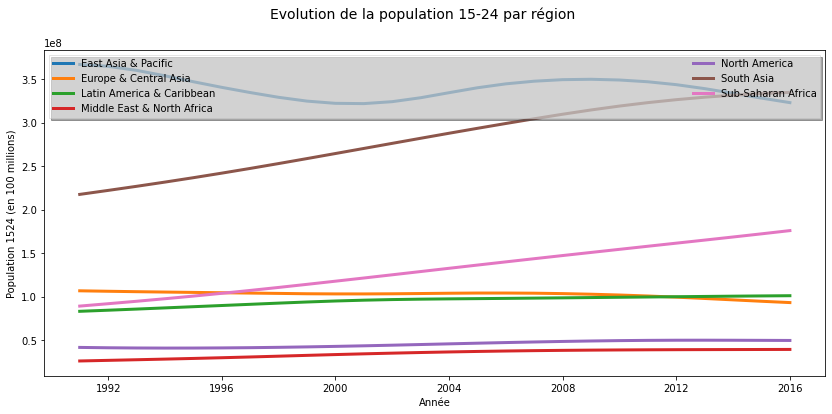

In [46]:
#graphique de l'évolution de la population 15_24 par région entre 1990 et 2015
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Evolution de la population 15-24 par région", fontsize  = 14)
Date_Deb = datetime.strptime('1990-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

for R in pop1524ByRegion['Region'].to_list():
    pop = pop1524ByRegion[pop1524ByRegion['Region']==R].loc[:,'1990':'2015']
    plt.plot(annees_ref,pop.T,linewidth = 3.0, label=R)
    
plt.xlabel('Année')
plt.ylabel('Population 1524 (en 100 millions)')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Les régions asie du du sud et afrique sub saharienne ont une tendance haussienne de la population 15-24. Les autres régions sont plutot stable.

In [47]:
#Sélection des colonnes pour calculer la moyenne, médiane... par région:
colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','CHANGE']
pop1524TotalByRegion = Pop15_24_Country[colIdx].groupby(['Region']).mean()
pop1524TotalByRegion.head()

MEAN        MEDIAN           STD  \
Region                                                                 
East Asia & Pacific         1.547181e+07  1.543227e+07  1.186489e+06   
Europe & Central Asia       2.326730e+06  2.340074e+06  2.117383e+05   
Latin America & Caribbean   3.274549e+06  3.298791e+06  2.321984e+05   
Middle East & North Africa  1.915354e+06  1.954754e+06  2.705798e+05   
North America               2.264608e+07  2.261289e+07  1.816559e+06   

                                VARIANCE     CHANGE  
Region                                               
East Asia & Pacific         1.121634e+13  14.781914  
Europe & Central Asia       1.156222e+11  -8.257562  
Latin America & Caribbean   1.971957e+11   9.931883  
Middle East & North Africa  1.691674e+11  22.099674  
North America               5.921012e+12  10.508578

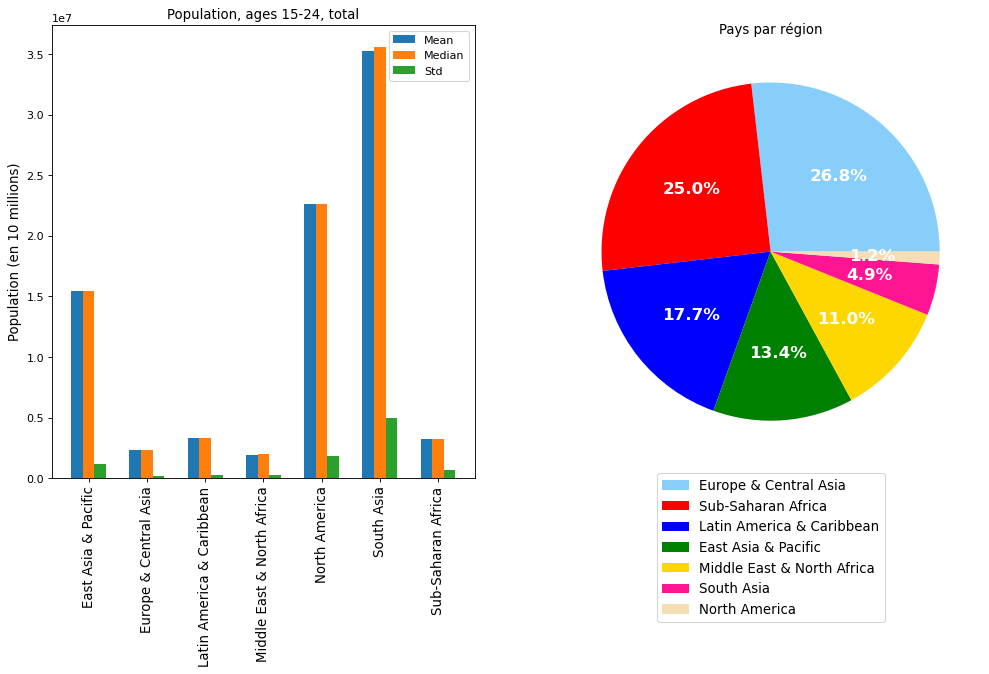

In [48]:
data_pop1524 = pop1524TotalByRegion[['MEAN','MEDIAN','STD']]

width = 0.2
x = np.arange(len(data_pop1524.index))

fig = plt.figure(figsize=(15, 7.5), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2, 1)

bar1 = ax1.bar(x - width,pop1524TotalByRegion['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,pop1524TotalByRegion['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,pop1524TotalByRegion['STD'].values,width,label='Std')

ax1.set_ylabel('Population (en 10 millions)',fontsize=12)
ax1.set_title('Population, ages 15-24, total',fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(data_pop1524.index,rotation=90,fontsize=12)
ax1.legend()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','deeppink','wheat']

ax2 = plt.subplot(1,2, 2)

wedges, texts, autotexts = ax2.pie(Pop15_24_Country['Region'].value_counts(),
                                   autopct=lambda pct: func(pct, Pop15_24_Country['Region'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax2.legend(wedges, Pop15_24_Country['Region'].value_counts().index,
          loc="center",
          fontsize = 12,
          bbox_to_anchor=(0.25, -0.7, 0.5, 1))

ax2.set_title('Pays par région')
plt.setp(autotexts, size=15, weight="bold")
plt.show()

La moyenne est très différente d'une région à une autre, l'écart type pour la région "Europe et asie centrale est faible alors que cette réion contient 26,8% des pays,alors que pour l'amérique du nord qui ne contient que 1,2% des pays l'écart type est beaucoup plus important ce qui montre l'écart important entre les pays au sein de cette région.

#### Population 1524 par groupe de revenu

In [49]:
Col_AgrG = list(map(str,range(1990,2016,1)))
Col_AgrG.append('Income Group')
pop1524ByIncomeGroup = Pop15_24_Country[Col_AgrG].groupby(['Income Group']).sum()
pop1524ByIncomeGroup.reset_index(level=0, inplace=True)
pop1524ByIncomeGroup.head(2)

Income Group         1990         1991         1992         1993  \
0     High income: OECD  131160545.0  130054394.0  129030787.0  128086340.0   
1  High income: nonOECD    8141094.0    8180037.0    8180229.0    8195730.0   

          1994         1995         1996         1997         1998  ...  \
0  127202393.0  126370157.0  125579695.0  124854040.0  124253128.0  ...   
1    8245620.0    8354658.0    8532542.0    8768639.0    9039305.0  ...   

          2006         2007         2008         2009         2010  \
0  125572384.0  125554225.0  125378250.0  125057015.0  124605467.0   
1   10510645.0   10658224.0   10786479.0   10898627.0   10990001.0   

          2011         2012         2013         2014         2015  
0  124017418.0  123300100.0  122502271.0  121689103.0  120913429.0  
1   11061072.0   11113835.0   11147237.0   11160259.0   11153471.0  

[2 rows x 27 columns]

In [50]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Evolution de la population 15-24", fontsize  = 14)
Date_Deb = datetime.strptime('1990-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

for IG in pop1524ByIncomeGroup['Income Group'].to_list():
    pop = pop1524ByIncomeGroup[pop1524ByIncomeGroup['Income Group']==IG].loc[:,'1990':'2015']
    plt.plot(annees_ref,pop.T,linewidth = 3.0, label=IG)
    
plt.xlabel('Année')
plt.ylabel('Population 1524 (en 100 millions)')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Les pays avec un revenu moyen inferieur ont une augmentation nette de la population 15-24, alors que c'est plutôt stable pour le reste des groupes de revenu

In [51]:
fig_box = px.box(
    Pop15_24_Country, x='Income Group', y='2015',
    title='Population 1524 par groupe de revenu en 2015',
    hover_data=['Country Name'],
    #points='all',
    color="Income Group",
    hover_name='Country Name',
    
)


fig_box.show()

Les points atypique représentent l'inde, la chine, les états unis..., ces pays appartiennet aux régions: North América, Asia. Pour ces régions nous avons vu que, la moyenne la médiane et l'eacrt type sont élevés par rapport aux autre régions

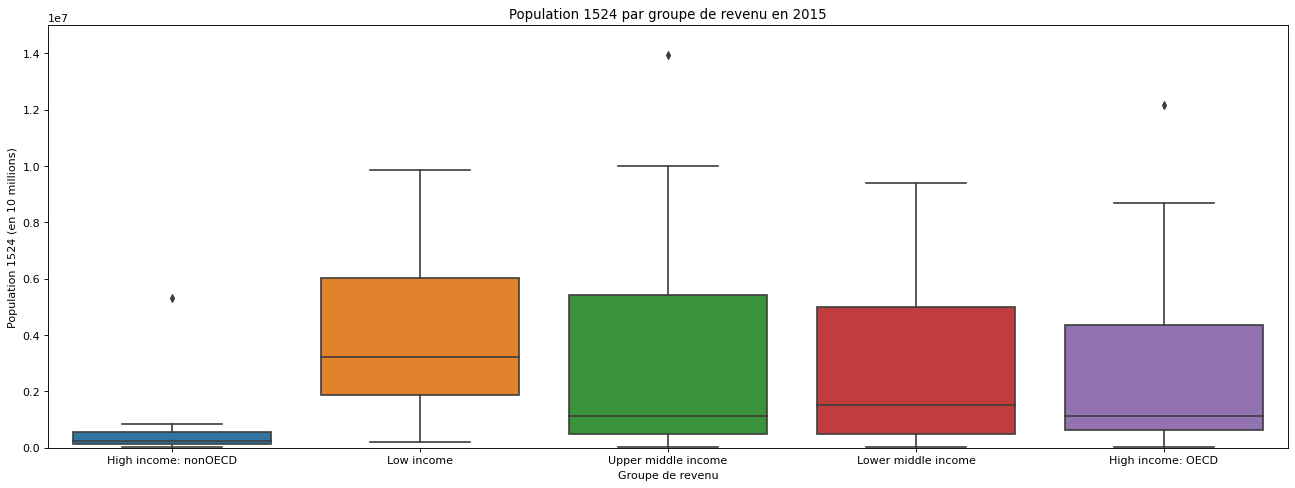

In [52]:
fig = plt.figure(figsize=(20, 7), dpi= 80, facecolor='w', edgecolor='k')

data = Pop15_24_Country.loc[:,['Income Group','2015']]
ax = sns.boxplot(x="Income Group",y="2015",data = data)
plt.ylim(0,1*15000000) # pour changer la taille mais on perd les point atypique
plt.xlabel('Groupe de revenu')
plt.ylabel('Population 1524 (en 10 millions)')
plt.title('Population 1524 par groupe de revenu en 2015')

plt.show()

On remarque qu'il y a des points atypiques pour chaque groupe de revenu, qui dépasse le maximum, la distribution est donc asymétrique avec une queue de distribution étalée à la droite de la médiane (ce qui confirme le SKEWNESS positif calculé)

### 2.b L'indicateur Internet Users:

In [53]:
Internet_Pays= recup_indicateur(Data, 'pays' ,'Internet users (per 100 people)')
Internet_Pays.sample(2)

Country Code               Region         Income Group Country Name  \
172          TON  East Asia & Pacific  Upper middle income        Tonga   
133          PAK           South Asia  Lower middle income     Pakistan   

                      Indicator Name  1970  1975  1976  1977  1978  ...  \
172  Internet users (per 100 people)   NaN   NaN   NaN   NaN   NaN  ...   
133  Internet users (per 100 people)   NaN   NaN   NaN   NaN   NaN  ...   

         2007     2008  2009  2010  2011   2012       2013       2014  \
172  7.179865  8.11077  10.0  16.0  25.0  30.00  32.753961  35.954441   
133  6.800000  7.00000   7.5   8.0   9.0   9.96  10.900000  12.000000   

          2015       2016  
172  38.651272  39.950000  
133  14.000000  15.514558  

[2 rows x 48 columns]

In [54]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(15, 7))
fig.suptitle("Données manquantes sur les utilisateurs d\'internet", fontsize  = 14)
plt.plot(Internet_Pays.iloc[:,5:].isna().sum(),linewidth = 3.0,color='red')

annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

plt.xlabel('Années')
plt.xticks(rotation = 'vertical')
plt.ylabel('Données manquantes')


#Internet_Pays.iloc[:,5:].isna().sum()

Text(0, 0.5, 'Données manquantes')

On commence à avoir des données sur les utilisateurs d'internet à partir des années 2000.

##### Internet Users par groupe de revenu:

In [55]:
Col_AgrG = list(map(str,range(2000,2016,1)))
Col_AgrG.append('Income Group')
Internet_byIncomeGroup = Internet_Pays[Col_AgrG].groupby(['Income Group']).mean()
Internet_byIncomeGroup.reset_index(level=0, inplace=True)
Internet_byIncomeGroup.head(2)

Income Group       2000       2001       2002       2003  \
0     High income: OECD  29.112452  34.679100  43.411281  49.307134   
1  High income: nonOECD  15.550856  19.834117  24.811039  28.937627   

        2004       2005       2006       2007       2008       2009  \
0  54.030489  57.906291  61.871843  66.115546  69.469000  72.278333   
1  32.757050  35.824596  40.084877  45.088060  49.896834  54.116626   

        2010       2011       2012       2013       2014       2015  
0  74.974000  76.622575  78.302014  80.101765  81.386639  82.730916  
1  58.356639  62.373093  67.400032  71.490503  74.550521  76.986402

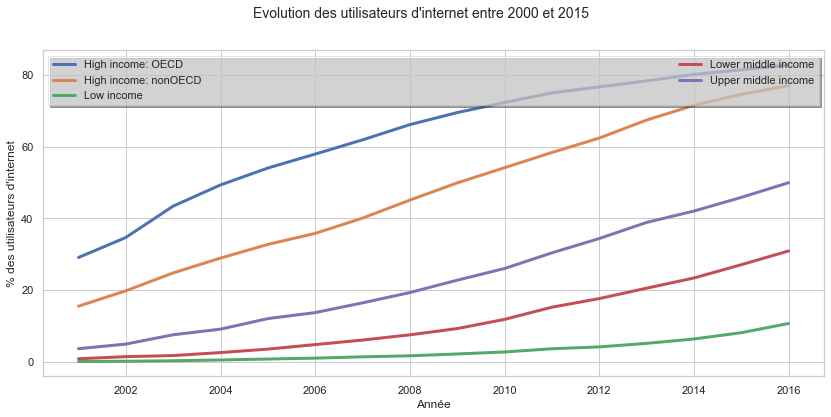

In [56]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Evolution des utilisateurs d'internet entre 2000 et 2015", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

for IG in Internet_byIncomeGroup['Income Group'].to_list():
    pop = Internet_byIncomeGroup[Internet_byIncomeGroup['Income Group']==IG].loc[:,'2000':'2015']
    plt.plot(annees_ref,pop.T,linewidth = 3.0, label=IG)
    


plt.xlabel('Année')
plt.ylabel('% des utilisateurs d\'internet')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Une dynamique haussière des utilisateurs d'internet pour tous les groupe de revenu avec une grande différence entre les pays avec un revenu bas et ceux avec un revenu élevé.

##### Internet Users par région:

In [57]:
Internet_Region = recup_indicateur(Data, 'Region' ,'Internet users (per 100 people)')
Internet_Region.head(2)

Country Code Region Income Group           Country Name  \
0          EAS    NaN          NaN    East Asia & Pacific   
1          ECS    NaN          NaN  Europe & Central Asia   

                    Indicator Name      1990  1991     1992      1993  \
0  Internet users (per 100 people)  0.007288   NaN      NaN  0.079278   
1  Internet users (per 100 people)  0.048116   NaN  0.26259  0.317773   

       1994  ...       2007       2008       2009       2010       2011  \
0  0.117382  ...  20.766523  25.253566  29.513198  34.230838  37.365156   
1  0.564867  ...  43.674382  47.359045  50.566038  56.119117  58.834630   

        2012       2013       2014       2015       2016  
0  40.709345  44.577349  46.812103  49.787924  52.796321  
1  63.486253  66.306669  68.944351  71.162003  73.914751  

[2 rows x 32 columns]

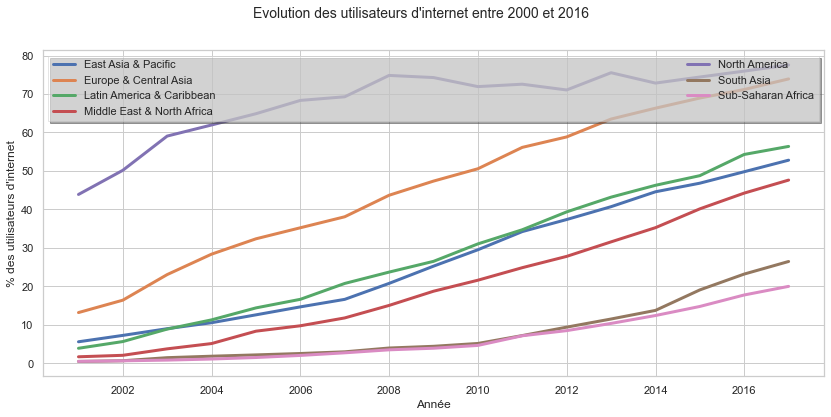

In [58]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Evolution des utilisateurs d'internet entre 2000 et 2016", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2016-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

for IU in Internet_Region['Country Name'].to_list():
    pop = Internet_Region[Internet_Region['Country Name']==IU].loc[:,'2000':'2016']
    plt.plot(annees_ref,pop.T,linewidth = 3.0, label=IU)
    


plt.xlabel('Année')
plt.ylabel('% des utilisateurs d\'internet')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

La distribution par région suit la même dynamique que celle par groupe de revenu, on remarque que l'afrique sub-saharienne a le pourcentage le moins élevé et l'amérique du nord a le pourcentage le plus élevé (80%)

### 2.c L'indicateur % des dépenses du gouvernement pour l'éducation:


In [59]:
gvrt_exp_educ_Pays= recup_indicateur(Data, 'Pays' , 'Expenditure on education as % of total government expenditure (%)')
gvrt_exp_educ_Pays.head(2)

Country Code                     Region          Income Group Country Name  \
0          ABW  Latin America & Caribbean  High income: nonOECD        Aruba   
1          AFG                 South Asia            Low income  Afghanistan   

                                      Indicator Name  1980  1981  1982  1983  \
0  Expenditure on education as % of total governm...   NaN   NaN   NaN   NaN   
1  Expenditure on education as % of total governm...   NaN   NaN   NaN   NaN   

   1984  ...  2006       2007     2008      2009      2010       2011  \
0   NaN  ...   NaN  20.788799  19.0362  21.53726  22.14366  21.745461   
1   NaN  ...   NaN        NaN      NaN       NaN  17.06756  16.048429   

        2012      2013      2014    2015  
0  20.634081  21.87459  19.61272     NaN  
1  10.356800  14.10280  14.46593  12.509  

[2 rows x 41 columns]

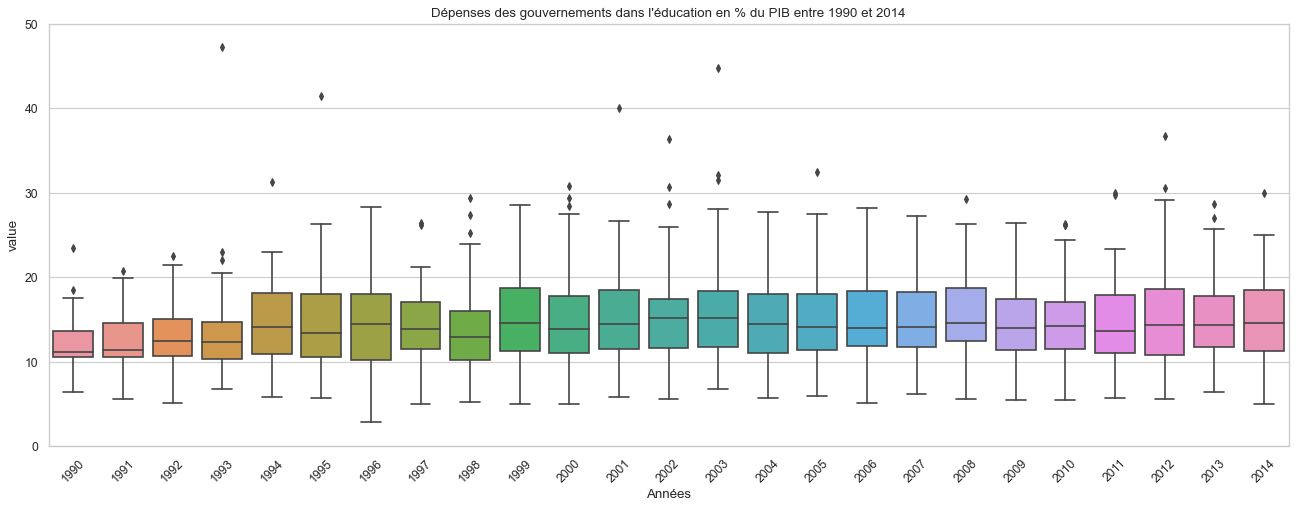

In [60]:

fig = plt.figure(figsize=(20, 7), dpi= 80, facecolor='w', edgecolor='k')

data = gvrt_exp_educ_Pays.loc[:,'1990':'2014']
data[data > 100.0] = np.nan

ax = sns.boxplot(x="variable",y="value",data = pd.melt(data))
ax.set_xticklabels(data.columns,rotation=45)
ax.set_title("Dépenses des gouvernements dans l'éducation en % du PIB entre 1990 et 2014")
plt.xlabel('Années')

plt.ylim(0,50)
plt.show()

Les écarts interquartile sont de plus en plus grosses, ce qui montre que l'invesstissement dans l'éducation en % du PIB est différent d'un pays à l'autre.

##### % des dépenses du gouvernement pour l'éducation par groupe de revenu:

In [61]:
Col_AgrG = list(map(str,range(1980,2015,1)))
Col_AgrG.append('Income Group')
gvrt_exp_educ_byIncomeGroup = gvrt_exp_educ_Pays[Col_AgrG].groupby(['Income Group']).mean()
gvrt_exp_educ_byIncomeGroup.reset_index(level=0, inplace=True)
gvrt_exp_educ_byIncomeGroup.head(2)

Income Group     1980       1981       1982       1983       1984  \
0     High income: OECD  9.86202  12.504603  12.130647  11.810438  11.611166   
1  High income: nonOECD      NaN        NaN        NaN        NaN        NaN   

        1985       1986       1987       1988  ...       2005       2006  \
0  11.801761  10.770641  11.105272  11.451651  ...  12.782765  12.807163   
1  18.872935        NaN  13.007410   5.134120  ...  14.789766  14.366262   

        2007       2008       2009       2010       2011       2012  \
0  12.673730  12.448379  12.539314  12.349883  12.448027  12.830921   
1  14.753808  15.416118  13.769568  14.243740  14.918625  15.636615   

        2013       2014  
0  12.810519  12.626716  
1  15.170465  12.777722  

[2 rows x 36 columns]

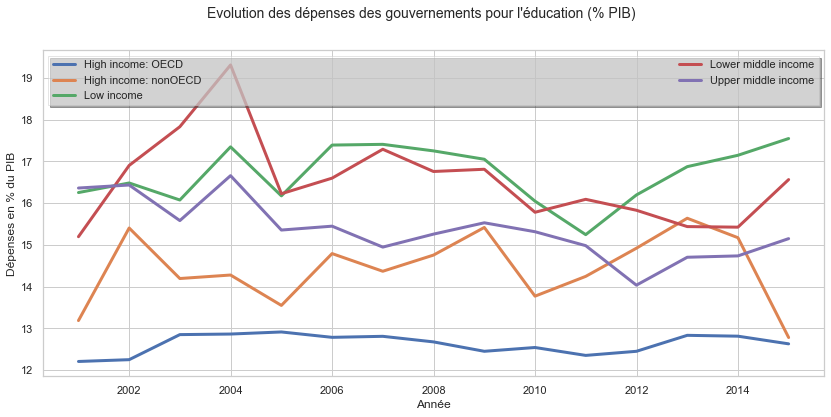

In [62]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Evolution des dépenses des gouvernements pour l'éducation (% PIB)", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2014-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

for IG in gvrt_exp_educ_byIncomeGroup['Income Group'].to_list():
    pop = gvrt_exp_educ_byIncomeGroup[gvrt_exp_educ_byIncomeGroup['Income Group']==IG].loc[:,'2000':'2014']
    plt.plot(annees_ref,pop.T,linewidth = 3.0, label=IG)
    

plt.xlabel('Année')
plt.ylabel('Dépenses en % du PIB')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Le pourcentage des dépenses des gouvernements évolue, avec un pourcentage des dépenses plus élevé pour les groupes des revenus moyen inferieur et bas. 

##### % des dépenses du gouvernement pour l'éducation par région:

In [63]:
gvrt_exp_educ_Region= recup_indicateur(Data, 'Region' , 'Expenditure on education as % of total government expenditure (%)')
gvrt_exp_educ_Region.head(2)

Empty DataFrame
Columns: []
Index: []

Pas de données par région, nous allons grouper les données des pays par région:

In [64]:
Col_AgrG = list(map(str,range(1980,2015,1)))
Col_AgrG.append('Region')
gvrt_exp_educ_Region = gvrt_exp_educ_Pays[Col_AgrG].groupby(['Region']).mean()
gvrt_exp_educ_Region.reset_index(level=0, inplace=True)
gvrt_exp_educ_Region.head(2)

Region     1980       1981       1982       1983       1984  \
0    East Asia & Pacific      NaN  16.083540  15.640620  12.238740   9.762240   
1  Europe & Central Asia  9.86202  11.765354  11.266755  10.943534  11.301211   

        1985       1986       1987       1988  ...       2005       2006  \
0  12.783477   9.706615  12.491950  13.186080  ...  15.935265  16.504714   
1  11.984865  10.759027  10.425748  10.217048  ...  12.814724  12.843925   

        2007       2008       2009       2010       2011       2012  \
0  16.258273  15.812959  15.623834  14.793776  15.295101  15.725361   
1  12.494572  12.606719  12.254765  11.963963  12.058626  12.543217   

        2013       2014  
0  15.513636  14.591774  
1  12.190090  11.652202  

[2 rows x 36 columns]

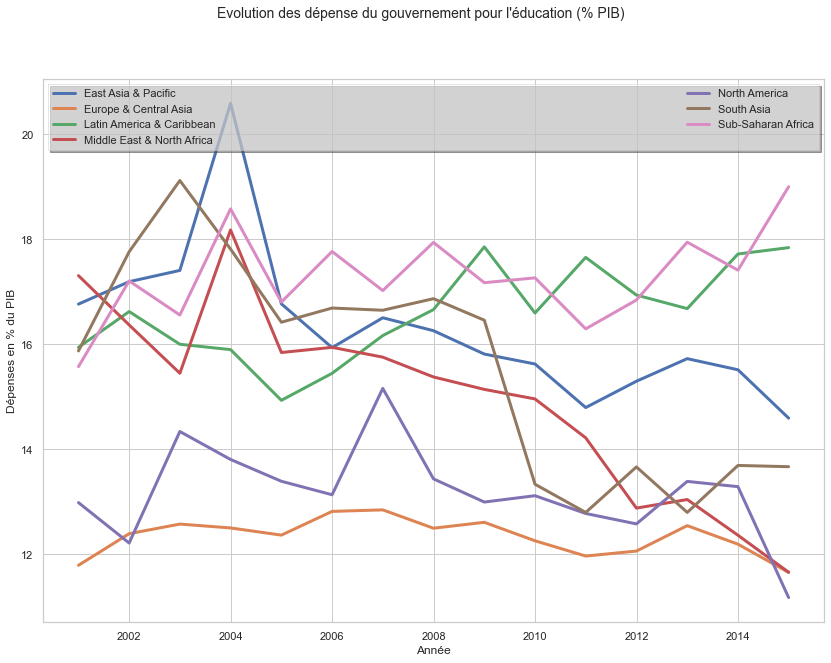

In [65]:
fig = plt.figure(figsize=(14, 10))
fig.suptitle("Evolution des dépense du gouvernement pour l'éducation (% PIB)", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2014-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

for IU in gvrt_exp_educ_Region['Region'].to_list():
    pop = gvrt_exp_educ_Region[gvrt_exp_educ_Region['Region']==IU].loc[:,'2000':'2014']
    plt.plot(annees_ref,pop.T,linewidth = 3.0, label=IU)
    
plt.xlabel('Année')
plt.ylabel('Dépenses en % du PIB')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Une évolution avec des piques pour l'ensemble des régions. Les régions europe, asie centrale et amérique du nord dépensent le moins en pourcentage du PIB pour l'éducation.

### 2.d L'indicateur projection du  PIB /habitant:

In [66]:
gdp_per_capita_pays= recup_indicateur(Data,'Pays','GDP per capita (constant 2005 US$)')
gdp_per_capita_pays.sample(2)

Country Code                 Region         Income Group  Country Name  \
60           GIN     Sub-Saharan Africa           Low income        Guinea   
164          TKM  Europe & Central Asia  Upper middle income  Turkmenistan   

                         Indicator Name  1970  1971  1972  1973  1974  ...  \
60   GDP per capita (constant 2005 US$)   NaN   NaN   NaN   NaN   NaN  ...   
164  GDP per capita (constant 2005 US$)   NaN   NaN   NaN   NaN   NaN  ...   

            2007         2008         2009         2010         2011  \
60    635.168547   646.968779   622.938229   635.671485   655.923443   
164  3489.330062  3949.048234  4129.543531  4439.203000  5006.296232   

            2012         2013         2014         2015         2016  
60    679.556106   690.666992   699.964084   707.366223   735.722667  
164  5462.980549  5909.771043  6399.270662  6693.935610  6986.855946  

[2 rows x 52 columns]

##### projection du PIB /habitant par groupe de revenu:

In [67]:
Col_AgrG = list(map(str,range(1970,2016,1)))
Col_AgrG.append('Income Group')
gdp_per_capita_byIncomeGroup = gdp_per_capita_pays[Col_AgrG].groupby(['Income Group']).sum()
gdp_per_capita_byIncomeGroup.reset_index(level=0, inplace=True)
gdp_per_capita_byIncomeGroup.head(2)

Income Group           1970           1971           1972  \
0     High income: OECD  457991.273230  473024.655484  494557.605394   
1  High income: nonOECD  171405.990823  179339.367057  189636.896983   

            1973           1974           1975           1976           1977  \
0  518805.526150  527167.328083  523641.184322  541630.731590  576563.943008   
1  198573.674298  206141.239219  314347.367820  330223.524306  353747.121162   

            1978  ...          2006          2007          2008          2009  \
0  592980.735219  ...  1.256800e+06  1.296742e+06  1.290068e+06  1.230542e+06   
1  340749.663525  ...  9.081283e+05  9.289485e+05  9.312932e+05  8.812473e+05   

           2010          2011          2012          2013          2014  \
0  1.249491e+06  1.263078e+06  1.259303e+06  1.265706e+06  1.285936e+06   
1  1.203600e+06  9.045919e+05  9.060422e+05  9.122755e+05  8.128472e+05   

           2015  
0  1.314810e+06  
1  7.977641e+05  

[2 rows x 47 columns]

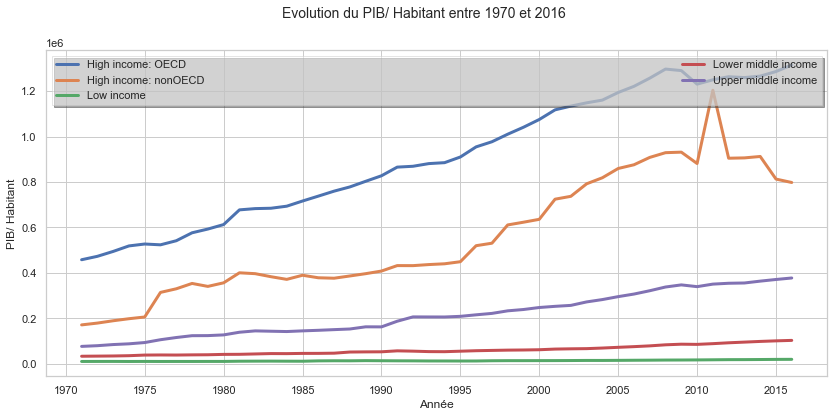

In [68]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Evolution du PIB/ Habitant entre 1970 et 2016", fontsize  = 14)
Date_Deb = datetime.strptime('1970-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

for IG in gdp_per_capita_byIncomeGroup['Income Group'].to_list():
    pop = gdp_per_capita_byIncomeGroup[gdp_per_capita_byIncomeGroup['Income Group']==IG].loc[:,'1970':'2015']
    plt.plot(annees_ref,pop.T,linewidth = 3.0, label=IG)
    
plt.xlabel('Année')
plt.ylabel('PIB/ Habitant')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Une augmontation du PIB par habitant plus prononcée pour les groupe de revenu élevés

##### projection du PIB /habitant par région:

In [69]:
gdp_per_capita_Region= recup_indicateur(Data,'Region','GDP per capita (constant 2005 US$)')
gdp_per_capita_Region.sample(2)

Country Code Region Income Group         Country Name  \
5          SAS    NaN          NaN           South Asia   
0          EAS    NaN          NaN  East Asia & Pacific   

                       Indicator Name         1970         1971         1972  \
5  GDP per capita (constant 2005 US$)   379.520439   373.883489   359.629365   
0  GDP per capita (constant 2005 US$)  2200.733170  2255.025893  2366.992073   

          1973         1974  ...         2007         2008         2009  \
5   364.736121   364.535644  ...  1073.344576  1098.417276  1164.853047   
0  2493.891565  2452.827497  ...  6981.152603  7174.526443  7221.621322   

          2010         2011         2012         2013         2014  \
5  1252.286986  1312.816303  1366.372788  1429.778640  1510.653652   
0  7679.834203  7980.135763  8295.707353  8631.590677  8926.071928   

          2015         2016  
5  1602.890709  1690.751251  
0  9231.014316  9545.149778  

[2 rows x 52 columns]

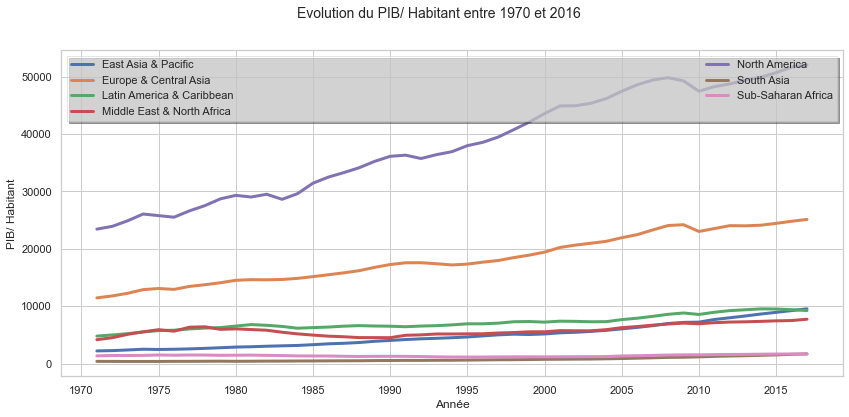

In [70]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Evolution du PIB/ Habitant entre 1970 et 2016", fontsize  = 14)
Date_Deb = datetime.strptime('1970-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2016-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

for IG in gdp_per_capita_Region['Country Name'].to_list():
    pop = gdp_per_capita_Region[gdp_per_capita_Region['Country Name']==IG].loc[:,'1970':'2016']
    plt.plot(annees_ref,pop.T,linewidth = 3.0, label=IG)
    
#plt.ylim(0,100)

plt.xlabel('Année')
plt.ylabel('PIB/ Habitant')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Le PIB par habitant a bien augmonté pour l'amérique du nord et l'europe, alors que cette dynamique est moins visible pour les autres régions

### 2.e L'indicateur % des personnes qui ont un PC personnel :

In [71]:
Personal_computers_Pays = recup_indicateur(Data,'Pays','Personal computers (per 100 people)')
Personal_computers_Pays.sample(2)

Country Code                     Region         Income Group  \
124          PAN  Latin America & Caribbean  Upper middle income   
39           CZE      Europe & Central Asia    High income: OECD   

       Country Name                       Indicator Name  1970  1975  1976  \
124          Panama  Personal computers (per 100 people)   NaN   NaN   NaN   
39   Czech Republic  Personal computers (per 100 people)   NaN   NaN   NaN   

     1977  1978  ...       2000       2001       2002       2003       2004  \
124   NaN   NaN  ...   3.437200   3.529704   3.618116   3.702784   3.935417   
39    NaN   NaN  ...  12.194648  14.660700  17.622750  20.580475  24.001108   

          2005      2006      2007      2008  2009  
124   4.377900  5.045925  5.499803  6.050407   NaN  
39   27.368652       NaN       NaN       NaN   NaN  

[2 rows x 41 columns]

Text(0, 0.5, 'Données manquantes')

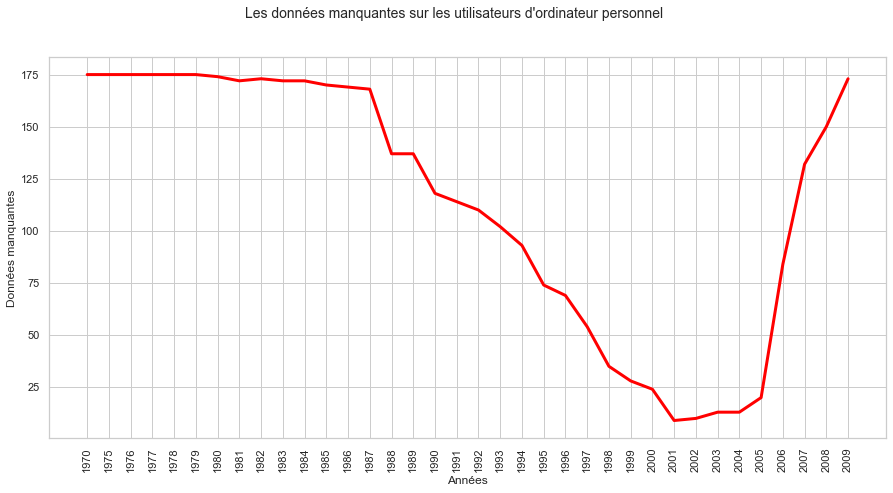

In [72]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle("Les données manquantes sur les utilisateurs d'ordinateur personnel", fontsize  = 14)
plt.plot(Personal_computers_Pays.iloc[:,5:].isna().sum(),linewidth = 3.0,color='red')

annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

plt.xlabel('Années')
plt.xticks(rotation = 'vertical')
plt.ylabel('Données manquantes')

#Personal_computers_Pays.iloc[:,5:].isna().sum()

La période avec le moins de valeurs manquantes est entre 2001 et 2006.

##### % des personnes qui ont un PC personnel par groupe de revenu:

In [73]:
Col_AgrG = list(map(str,range(1975,2009,1)))
Col_AgrG.append('Income Group')
Personal_computers_byIncomeGroup = Personal_computers_Pays[Col_AgrG].groupby(['Income Group']).mean()
Personal_computers_byIncomeGroup.reset_index(level=0, inplace=True)
Personal_computers_byIncomeGroup.head(2)

Income Group  1975  1976  1977  1978  1979      1980      1981  \
0     High income: OECD   NaN   NaN   NaN   NaN   NaN  0.407979  0.859844   
1  High income: nonOECD   NaN   NaN   NaN   NaN   NaN       NaN       NaN   

      1982     1983  ...       1999       2000       2001       2002  \
0  1.77758  3.35816  ...  27.611142  31.654569  34.585926  36.527843   
1      NaN      NaN  ...  16.884807  18.605911  18.073490  19.576914   

        2003       2004       2005     2006       2007       2008  
0  40.477346  46.157035  50.899635  58.7493  45.990393  49.660688  
1  20.224778  24.036866  24.888184  33.8319  48.122243  53.075058  

[2 rows x 35 columns]

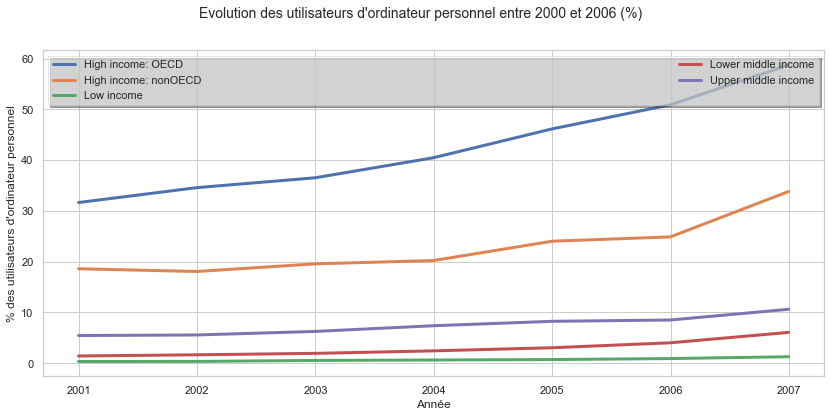

In [74]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Evolution des utilisateurs d'ordinateur personnel entre 2000 et 2006 (%)", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2006-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

for IG in Personal_computers_byIncomeGroup['Income Group'].to_list():
    pop = Personal_computers_byIncomeGroup[Personal_computers_byIncomeGroup['Income Group']==IG].loc[:,'2000':'2006']
    plt.plot(annees_ref,pop.T,linewidth = 3.0, label=IG)
    
plt.xlabel('Année')
plt.ylabel('% des utilisateurs d\'ordinateur personnel')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

La dynamique du pourcentage d'utilisateurs d'un ordinateur personnel est plus importante pour les pays avec un revenu élevé

##### % des personnes qui ont un PC personnel par région:

In [75]:
Personal_computers_Region = recup_indicateur(Data,'Region','Personal computers (per 100 people)')
Personal_computers_Region.sample(2)

Country Code Region Income Group                Country Name  \
3          MEA    NaN          NaN  Middle East & North Africa   
1          ECS    NaN          NaN       Europe & Central Asia   

                        Indicator Name  1981  1982  1983  1984  1985  ...  \
3  Personal computers (per 100 people)   NaN   NaN   NaN   NaN   NaN  ...   
1  Personal computers (per 100 people)   NaN   NaN   NaN   NaN   NaN  ...   

        1998       1999       2000       2001       2002       2003  \
3   2.752122   3.215034   3.597743   4.199813   4.204574   5.423585   
1  13.261902  14.834288  17.438565  19.082580  21.121883  23.094308   

        2004       2005       2006  2007  
3   5.862118   5.124586   7.256796   NaN  
1  26.569107  30.959017  34.330533   NaN  

[2 rows x 32 columns]

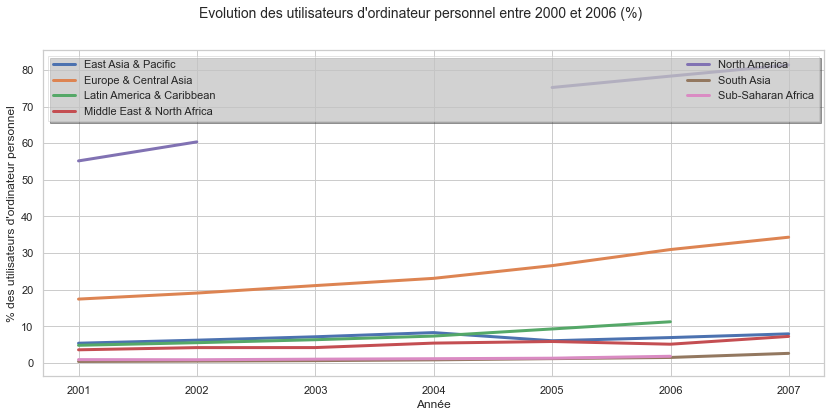

In [76]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Evolution des utilisateurs d'ordinateur personnel entre 2000 et 2006 (%)", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2006-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

for IG in Personal_computers_Region['Country Name'].to_list():
    pop = Personal_computers_Region[Personal_computers_Region['Country Name']==IG].loc[:,'2000':'2006']
    plt.plot(annees_ref,pop.T,linewidth = 3.0, label=IG)
    

plt.xlabel('Année')
plt.ylabel('% des utilisateurs d\'ordinateur personnel')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Comme pour les utilisateurs d'internet, les utilisateurs d'ordinateur personnel sont plus nombreux en amérique du nord, europe et asie centrale

### 2.f L'indicateur Nombre de client potentiel :

Pour calculer le nombre de client potentiel, nous allons nous interesser à deux indicateurs: Nombre d'élèves de lycée et nombre d'élèves d'université.

#### 2.f.1 L'indicateur Nombre d 'étudiants en secondaire

In [77]:
eleves_secondaire_pays= recup_indicateur(Data,'Pays','Enrolment in upper secondary education, both sexes (number)')
eleves_secondaire_pays.head(2)

Country Code                     Region          Income Group Country Name  \
0          ABW  Latin America & Caribbean  High income: nonOECD        Aruba   
1          AFG                 South Asia            Low income  Afghanistan   

                                      Indicator Name    1999    2000  \
0  Enrolment in upper secondary education, both s...  3258.0  3119.0   
1  Enrolment in upper secondary education, both s...     NaN     NaN   

       2001    2002      2003  ...      2006      2007      2008      2009  \
0    3318.0  3525.0    3655.0  ...    3883.0    4430.0    4060.0    3976.0   
1  159952.0     NaN  115583.0  ...  271144.0  285290.0  361193.0  443002.0   

       2010      2011      2012      2013      2014  2015  
0    3913.0    3970.0    4841.0       NaN       NaN   NaN  
1  567344.0  743405.0  881415.0  969267.0  968769.0   NaN  

[2 rows x 22 columns]

##### Nombre d 'étudiants en secondaire par groupe de revenu:

In [78]:
Col_AgrG = list(map(str,range(1999,2015,1)))
Col_AgrG.append('Income Group')
eleves_secondaire_byIncomeGroup = eleves_secondaire_pays[Col_AgrG].groupby(['Income Group']).sum()
eleves_secondaire_byIncomeGroup.reset_index(level=0, inplace=True)
eleves_secondaire_byIncomeGroup.head(2)

Income Group        1999        2000        2001        2002  \
0     High income: OECD  38738012.0  38798385.0  37025784.0  37483875.0   
1  High income: nonOECD    899932.0    938287.0   1210979.0   1130523.0   

         2003        2004        2005        2006        2007        2008  \
0  37704242.0  36930956.0  39139380.0  38714726.0  38902292.0  38578332.0   
1   1278207.0   1217227.0   2520874.0   1288264.0   2701780.0   1275572.0   

         2009        2010        2011        2012          2013          2014  
0  38204203.0  38576749.0  38242216.0  37671994.0  4.014802e+07  3.028274e+07  
1   2908370.0   1266211.0   1293735.0   1312063.0  2.763614e+06  2.664781e+06

<ipython-input-79-34fccca9c673>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



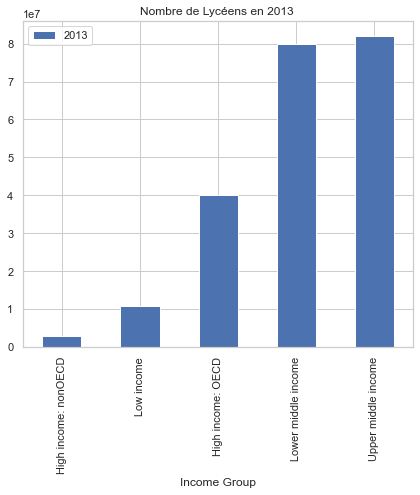

In [79]:
col=['Income Group','2013']
eleves_secondaire=eleves_secondaire_byIncomeGroup[col]
eleves_secondaire.sort_values(by='2013',ascending=True, inplace=True)
eleves_secondaire.plot(kind='bar',x='Income Group',figsize=(7,6),title="Nombre de Lycéens en 2013 ")

Les deux groupes de revenu moyen inférieur et supérieur ont le plus d'élèves en secondaire

##### Nombre d 'étudiants en secondaire par région:

In [80]:
eleves_secondaire_Region= recup_indicateur(Data,'Region','Enrolment in upper secondary education, both sexes (number)')
eleves_secondaire_Region.head(2)

Country Code Region Income Group           Country Name  \
0          EAS    NaN          NaN    East Asia & Pacific   
1          ECS    NaN          NaN  Europe & Central Asia   

                                      Indicator Name  1992        1993  \
0  Enrolment in upper secondary education, both s...   NaN         NaN   
1  Enrolment in upper secondary education, both s...   NaN  34367072.0   

         1994        1995        1996  ...        2005        2006  \
0  31591338.0  33300848.0  35485904.0  ...  56536580.0  60193804.0   
1  34935264.0  34773828.0  35243104.0  ...  34544268.0  34181844.0   

         2007        2008        2009        2010        2011        2012  \
0  64407352.0  66618384.0  68287736.0  68696280.0  69400192.0  69689864.0   
1  33928220.0  33208936.0  32863088.0  32992958.0  32704622.0  32278256.0   

         2013        2014  
0  71711304.0  68691424.0  
1  35918936.0  35525304.0  

[2 rows x 28 columns]

<ipython-input-81-097ee2b5ece8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



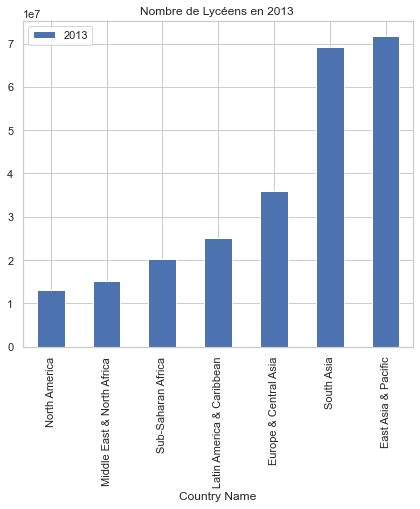

In [81]:
col=['Country Name','2013']
eleves_secondaire=eleves_secondaire_Region[col]
eleves_secondaire.sort_values(by='2013',ascending=True, inplace=True)
eleves_secondaire.plot(kind='bar',x='Country Name',figsize=(7,6),title="Nombre de Lycéens en 2013 ")

Les deux régions qui arrive en tête et de loins sont "South Asia" et "East Asia & Pacific" 

### 2.f.2 L'indicateur Nombre d'étudiants en université:

In [82]:
eleves_univ_pays= recup_indicateur(Data,'Pays','Enrolment in tertiary education, all programmes, both sexes (number)')
eleves_univ_pays.sample(2)

Country Code               Region       Income Group Country Name  \
13          BDI   Sub-Saharan Africa         Low income      Burundi   
10          AUS  East Asia & Pacific  High income: OECD    Australia   

                                       Indicator Name      1970      1971  \
13  Enrolment in tertiary education, all programme...       NaN     466.0   
10  Enrolment in tertiary education, all programme...  179664.0  193532.0   

        1972      1973      1974  ...       2007       2008       2009  \
13     490.0     482.0     744.0  ...    19296.0    21856.0    24290.0   
10  208149.0  223855.0  252972.0  ...  1083715.0  1117804.0  1199845.0   

         2010       2011       2012       2013       2014  2015  2016  
13    29269.0    28595.0    36766.0    44887.0    51225.0   NaN   NaN  
10  1276488.0  1324257.0  1364203.0  1390478.0  1453521.0   NaN   NaN  

[2 rows x 52 columns]

##### Nombre d 'étudiants en université par groupe de revenu:

In [83]:
Col_AgrG = list(map(str,range(1999,2015,1)))
Col_AgrG.append('Income Group')
eleves_univ_byIncomeGroup = eleves_univ_pays[Col_AgrG].groupby(['Income Group']).sum()
eleves_univ_byIncomeGroup.reset_index(level=0, inplace=True)
eleves_univ_byIncomeGroup.head(2)

Income Group        1999        2000        2001        2002  \
0     High income: OECD  33312822.0  33094802.0  32314802.0  35827078.0   
1  High income: nonOECD    843345.0    849170.0    966647.0   1015840.0   

         2003        2004        2005        2006        2007        2008  \
0  37018321.0  37712116.0  38471423.0  38873881.0  39268648.0  39187840.0   
1   1350521.0   1422072.0   1460455.0   1514002.0   1933194.0   2245224.0   

         2009        2010        2011        2012          2013          2014  
0  40375133.0  42904611.0  43903818.0  43989367.0  4.481080e+07  4.463086e+07  
1   2354263.0   2544189.0   2575570.0   2656029.0  3.164725e+06  3.002954e+06

<ipython-input-84-a39cf3269c84>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



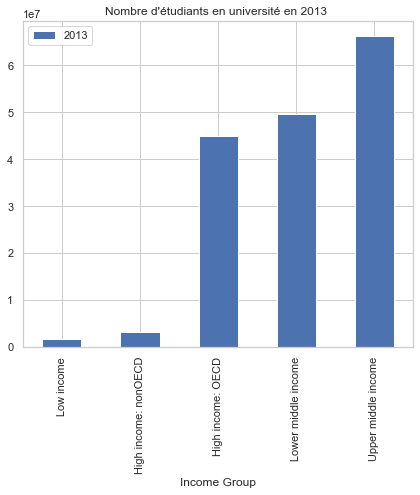

In [84]:
col=['Income Group','2013']
eleves_univ=eleves_univ_byIncomeGroup[col]
eleves_univ.sort_values(by='2013',ascending=True, inplace=True)
eleves_univ.plot(kind='bar',x='Income Group',figsize=(7,6),title="Nombre d'étudiants en université en 2013 ")

Une grande différence pour les étudiants en univesité entre les pays avec un revenu moyen supérieur et les pays avec un revenu bas

##### Nombre d 'étudiants en université par région:

In [85]:
eleves_univ_Region= recup_indicateur(Data,'Region','Enrolment in tertiary education, all programmes, both sexes (number)')
eleves_univ_Region.sample(2)

Country Code Region Income Group                Country Name  \
3          MEA    NaN          NaN  Middle East & North Africa   
4          NAC    NaN          NaN               North America   

                                      Indicator Name          1970       1971  \
3  Enrolment in tertiary education, all programme...  6.567273e+05   692875.5   
4  Enrolment in tertiary education, all programme...  9.194405e+06  9435876.0   

        1972          1973          1974  ...        2005        2006  \
3   782682.5  8.857456e+05  9.817238e+05  ...   8950445.0   9478354.0   
4  9919557.0  1.029813e+07  1.063044e+07  ...  18565896.0  18792044.0   

         2007        2008        2009        2010        2011        2012  \
3  10297572.0  11220022.0  11547454.0  12312381.0  12516851.0  13342759.0   
4  19078368.0  19583180.0  20453688.0  21791482.0  22388682.0  22376048.0   

         2013        2014  
3  13751028.0  14332233.0  
4  21369160.0  21096660.0  

[2 rows x 50 columns]

<ipython-input-86-7c3c715777c2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



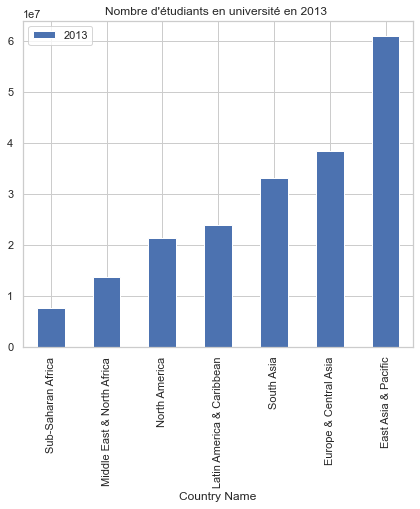

In [86]:
col=['Country Name','2013']
eleves_univ=eleves_univ_Region[col]
eleves_univ.sort_values(by='2013',ascending=True, inplace=True)
eleves_univ.plot(kind='bar',x='Country Name',figsize=(7,6),title="Nombre d'étudiants en université en 2013 ")

Les régions qui ont le plus d'étudiants en université sont "Europe & Central Asia" et "East Asia & Pacific"

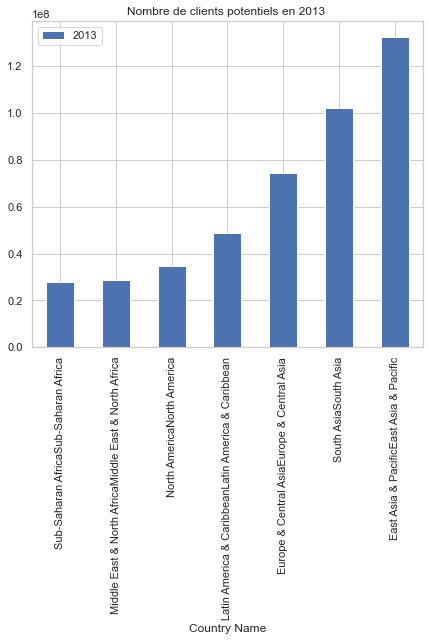

In [145]:
Clinet_potentiel = (eleves_univ + eleves_secondaire).sort_values(by='2013')
Clinet_potentiel.plot(kind='bar',x='Country Name',figsize=(7,6),title="Nombre de clients potentiels en 2013 ")

## 3.Présélection des pays:

#### 3.a Porposition de métrique d'évaluation du potentiel e-learning par pays

La métrique sera basée sur les rangs de chaque pays sur les indicateurs retenus. Lepotentiel de chaque pays sera une synthèse des rangs.

Avantage:
- Métrique facile à comprendre et permettant de proriser les pays

Inconvéniants:
- Très simplifiée et ne tient pas compte de chaque indicateur pris individuellement
- Absence de pondération des indicateurs

In [87]:
# Fonction pour calculer le rang de chaque pays par indicateur choisi:

def rang(data,newcolumn,annee):
    rang = data[["Country Name",annee]]
    rang.columns = ["Country Name",newcolumn]
    rang['Rang_'+newcolumn] = rang[newcolumn].rank(method='average', numeric_only=None, na_option='keep',ascending=False)
    rang.sort_values(by='Rang_'+newcolumn, ascending=True, inplace=True)
    return rang

##### Rang sur l'indicateur population 15_24

In [88]:
#Internet_Pays.sort_values(by="2015", ascending = False, inplace = True)
#Internet_Pays.head(10)

In [89]:
#choix de l'année 2015 comme année de référence car c'est la colonne avec le moins de valeurs manquantes
rang_pop15_24 = rang(Pop15_24_Country,'Pop1524','2015') 
rang_pop15_24.head()

<ipython-input-87-7c38720ee7a6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-7c38720ee7a6>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name      Pop1524  Rang_Pop1524
73           India  244120201.0           1.0
32           China  197026759.0           2.0
167  United States   45147517.0           3.0
72       Indonesia   41819264.0           4.0
125       Pakistan   39080811.0           5.0

In [90]:
#Nous ne disposons pas des données pour tous les pays(seulement 164 des 211)
rang_pop15_24.shape

(164, 3)

#### Rang sur l'indicateur diffusion d'internet dans le monde

In [91]:
#Internet_Pays.isna().sum()

In [92]:
#choix de l'année 2015 comme année de référence car c'est la colonne avec le moins de valeurs manquantes
rang_internetUser = rang(Internet_Pays,'UserInternet','2015')
rang_internetUser.head()

<ipython-input-87-7c38720ee7a6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-7c38720ee7a6>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name  UserInternet  Rang_UserInternet
23       Bermuda      98.32361                1.0
80       Iceland      98.20000                2.0
102   Luxembourg      97.33410                3.0
4        Andorra      96.91000                4.0
129       Norway      96.81030                5.0

In [93]:
rang_internetUser.shape

(190, 3)

#### Rang sur l'indicateur % des dépenses du gouvernement pour l'éducation

In [94]:
#gvrt_exp_educ_Pays.isna().sum()

In [95]:
#choix de l'année 2010 comme année de référence car c'est la colonne avec le moins de valeurs manquantes
rang_gvrtDepenseEduc= rang(gvrt_exp_educ_Pays,'DepensegvrtEduc','2010')
rang_gvrtDepenseEduc.head(5)

<ipython-input-87-7c38720ee7a6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-7c38720ee7a6>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name  DepensegvrtEduc  Rang_DepensegvrtEduc
48      Ethiopia        26.304041                   1.0
109      Namibia        26.193251                   2.0
13         Benin        26.143961                   3.0
152      Tunisia        24.398001                   4.0
21       Bolivia        24.127790                   5.0

In [96]:
rang_gvrtDepenseEduc.shape

(166, 3)

#### Rang sur l'indicateur projection du % PIB /habitant:

In [97]:
#gdp_per_capita_pays.isna().sum()

In [98]:
rang_gdp = rang(gdp_per_capita_pays,'GDP','2015')
rang_gdp.head()

<ipython-input-87-7c38720ee7a6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-7c38720ee7a6>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name            GDP  Rang_GDP
101   Luxembourg  107648.608008       1.0
127       Norway   90132.389163       2.0
75   Isle of Man   84046.136016       3.0
31   Switzerland   76472.459488       4.0
77       Ireland   67590.370360       5.0

In [99]:
rang_gdp.shape

(185, 3)

#### Rang sur l'indicateur % des personnes qui ont un PC personnel

In [100]:
#Personal_computers_Pays.isna().sum()

In [101]:
rang_pctPC = rang(Personal_computers_Pays,'PctPC','2005')
rang_pctPC.head()

<ipython-input-87-7c38720ee7a6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-7c38720ee7a6>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name      PctPC  Rang_PctPC
28        Canada  87.728023         1.0
29   Switzerland  86.790933         2.0
118  Netherlands  85.528113         3.0
149       Sweden  83.586531         4.0
143   San Marino  81.914358         5.0

In [102]:
rang_pctPC.shape

(176, 3)

#### Rang sur l'indicateur nombre de clients potentiel


In [103]:
#eleves_secondaire_pays.isna().sum()

In [104]:
rang_secondaire = rang(eleves_secondaire_pays,'Secondaire','2010')
rang_universite= rang(eleves_univ_pays,'Universite','2010')

rang_clientspotentiel = rang_secondaire.merge(rang_universite, how ="outer", on = "Country Name")
rang_clientspotentiel['Rang_Client potentiel']=rang_clientspotentiel['Rang_Secondaire']+rang_clientspotentiel['Rang_Universite']
rang_clientspotentiel.sort_values(by='Rang_Client potentiel', ascending=True, inplace=True)
rang_clientspotentiel.head()

<ipython-input-87-7c38720ee7a6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-7c38720ee7a6>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name  Secondaire  Rang_Secondaire  Universite  Rang_Universite  \
0          India  48265864.0              1.0  20740740.0              2.0   
1          China  44693168.0              2.0  31046736.0              1.0   
2  United States  11701279.0              3.0  20427708.0              3.0   
3         Brazil   9284000.0              4.0   6552707.0              4.0   
4      Indonesia   8179071.0              5.0   5001048.0              5.0   

   Rang_Client potentiel  
0                    3.0  
1                    3.0  
2                    6.0  
3                    8.0  
4                   10.0

In [105]:
rang_clientspotentiel.shape

(188, 6)

In [106]:
Rang = rang_pop15_24.merge(rang_internetUser, how ="outer", on = "Country Name")
Rang = Rang.merge(rang_gvrtDepenseEduc, how ="outer", on = "Country Name")
Rang = Rang.merge(rang_gdp,how ="outer", on = "Country Name")
Rang = Rang.merge(rang_pctPC,how ="outer", on = "Country Name")
Rang = Rang.merge(rang_clientspotentiel,how ="outer", on = "Country Name")
Rang

Country Name      Pop1524  Rang_Pop1524  UserInternet  \
0                       India  244120201.0           1.0     26.000000   
1                       China  197026759.0           2.0     50.300000   
2               United States   45147517.0           3.0     74.554202   
3                   Indonesia   41819264.0           4.0     21.976068   
4                    Pakistan   39080811.0           5.0     14.000000   
..                        ...          ...           ...           ...   
187                     Palau          NaN           NaN           NaN   
188                San Marino          NaN           NaN           NaN   
189  Turks and Caicos Islands          NaN           NaN           NaN   
190               Isle of Man          NaN           NaN           NaN   
191                    Kosovo          NaN           NaN           NaN   

     Rang_UserInternet  DepensegvrtEduc  Rang_DepensegvrtEduc           GDP  \
0                127.0        11.742780                  87.0   1758.043376   
1                 93.0              NaN                   NaN   6496.624013   
2                 43.0        13.055140                  65.0  51855.913480   
3                136.0        16.654181                  33.0   3827.548307   
4                158.0        11.864660                  84.0   1140.206271   
..                 ...              ...                   ...           ...   
187                NaN              NaN                   NaN  10811.074224   
188                NaN        10.781290                  92.0  52476.970128   
189                NaN              NaN                   NaN           NaN   
190                NaN              NaN                   NaN  84046.136016   
191                NaN              NaN                   NaN   3792.291753   

     Rang_GDP      PctPC  Rang_PctPC  Secondaire  Rang_Secondaire  Universite  \
0       135.0   1.508237       117.0  48265864.0              1.0  20740740.0   
1        86.0   4.818777        87.0  44693168.0              2.0  31046736.0   
2        13.0  77.272444         6.0  11701279.0              3.0  20427708.0   
3       107.0   1.463376       120.0   8179071.0              5.0   5001048.0   
4       147.0        NaN         NaN   4153684.0              7.0         NaN   
..        ...        ...         ...         ...              ...         ...   
187      61.0        NaN         NaN         NaN              NaN         NaN   
188      11.0  81.914358         5.0      1401.0            136.0       937.0   
189       NaN        NaN         NaN         NaN              NaN         5.0   
190       3.0        NaN         NaN         NaN              NaN         NaN   
191     109.0        NaN         NaN         NaN              NaN         NaN   

     Rang_Universite  Rang_Client potentiel  
0                2.0                    3.0  
1                1.0                    3.0  
2                3.0                    6.0  
3                5.0                   10.0  
4                NaN                    NaN  
..               ...                    ...  
187              NaN                    NaN  
188            129.0                  265.0  
189            131.0                    NaN  
190              NaN                    NaN  
191              NaN                    NaN  

[192 rows x 16 columns]

In [107]:
#Au total nous avons classé 192 pays des 211 existants
Rang.shape

(192, 16)

In [147]:
# Rang total: somme des rangs des indicateurs choisi:
Rang["Rang_Total"] = Rang['Rang_Pop1524']+Rang['Rang_UserInternet']+Rang['Rang_DepensegvrtEduc']
+Rang['Rang_GDP']+Rang['Rang_PctPC']+Rang['Rang_Client potentiel']
Rang.sort_values(by='Rang_Total', ascending=True, inplace=True)
Rang.head(2)

Country Name     Pop1524  Rang_Pop1524  UserInternet  Rang_UserInternet  \
23  United Kingdom   7731522.0          24.0     92.000300               11.0   
9           Mexico  20336734.0          10.0     57.431043               78.0   

    DepensegvrtEduc  Rang_DepensegvrtEduc           GDP  Rang_GDP      PctPC  \
23         12.95248                  68.0  41536.919115      24.0  75.730518   
9          19.42909                  17.0   9615.312229      67.0  12.643158   

    Rang_PctPC  Secondaire  Rang_Secondaire  Universite  Rang_Universite  \
23         7.0   3080622.0             12.0   2479197.0             12.0   
9         54.0   4054709.0              8.0   2847376.0              8.0   

    Rang_Client potentiel  Rang_Total  
23                   24.0       103.0  
9                    16.0       105.0

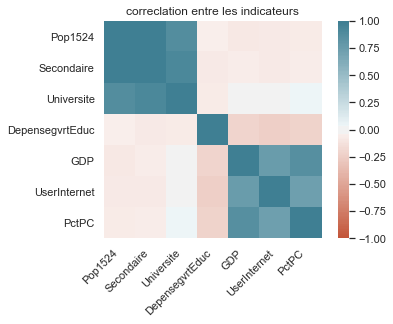

In [157]:
col=['Country Name','Pop1524','Secondaire','Universite','DepensegvrtEduc','GDP','UserInternet','PctPC']
data= Rang[col]
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_title('correclation entre les indicateurs')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Les indicateur Population 15-24 et le nombre d'étudiants(lycée et université) sont corrélés, ainsi que les indicateurs utilisateurs d'internet et utilisateurs d'ordinateur personnel. Par contre les indicateurs PIB par habitant et % des dépenses pour l'éducation ne sont pas corrélés

In [152]:
mycol = ['Country Name','Rang_Pop1524','Rang_UserInternet','Rang_DepensegvrtEduc','Rang_GDP','Rang_PctPC','Rang_Client potentiel','Rang_Total']
Rang[mycol].sort_values(by='Rang_Total',ascending=True, inplace=True)
Rang[mycol].head(10)

<ipython-input-152-d83a478b30f7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name  Rang_Pop1524  Rang_UserInternet  Rang_DepensegvrtEduc  \
23  United Kingdom          24.0               11.0                  68.0   
9           Mexico          10.0               78.0                  17.0   
35        Malaysia          36.0               52.0                  21.0   
2    United States           3.0               43.0                  65.0   
27       Argentina          28.0               59.0                  42.0   
14    South Africa          15.0               90.0                  24.0   
13           Japan          14.0               13.0                 103.0   
18        Colombia          19.0               82.0                  36.0   
21         Germany          22.0               20.0                  96.0   
43          Canada          44.0               17.0                  78.0   

    Rang_GDP  Rang_PctPC  Rang_Client potentiel  Rang_Total  
23      24.0         7.0                   24.0       103.0  
9       67.0        54.0                   16.0       105.0  
35      62.0        34.0                   50.0       109.0  
2       13.0         6.0                    6.0       111.0  
27      65.0        64.0                   31.0       129.0  
14      77.0        66.0                    NaN       129.0  
13      17.0         NaN                   16.0       130.0  
18      78.0        92.0                   41.0       137.0  
21      19.0        13.0                    NaN       138.0  
43      15.0         1.0                    NaN       139.0

In [109]:
#les 5 pays choisi:
Rang[['Country Name','Rang_Total']].head()

Country Name  Rang_Total
23  United Kingdom       103.0
9           Mexico       105.0
35        Malaysia       109.0
2    United States       111.0
27       Argentina       129.0

### 4. Focus sur les pays choisis

Afin d'avoir une référence pour mieux comprendre les chiffres nous avons ajouté les données de la france à titre comparatif:

##### Indicateur population 15-24:

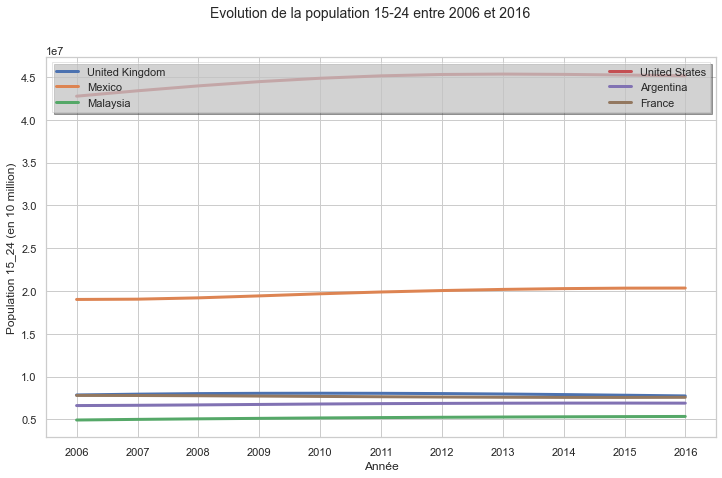

In [126]:
fig = plt.figure(figsize=(12, 7))
fig.suptitle("Evolution de la population 15-24 entre 2006 et 2016", fontsize  = 14)
Date_Deb = datetime.strptime('2005-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

United_Kingdom = Pop15_24_Country[Pop15_24_Country['Country Code']=='GBR'].loc[:,'2005':'2015']
Mexico = Pop15_24_Country[Pop15_24_Country['Country Code']=='MEX'].loc[:,'2005':'2015']
Malaysia = Pop15_24_Country[Pop15_24_Country['Country Code']=='MYS'].loc[:,'2005':'2015']
United_States = Pop15_24_Country[Pop15_24_Country['Country Code']=='USA'].loc[:,'2005':'2015']
Argentina= Pop15_24_Country[Pop15_24_Country['Country Code']=='ARG'].loc[:,'2005':'2015']
France= Pop15_24_Country[Pop15_24_Country['Country Code']=='FRA'].loc[:,'2005':'2015']

plt.plot(annees_ref,United_Kingdom.T,linewidth = 3.0, label='United Kingdom')
plt.plot(annees_ref,Mexico.T,linewidth = 3.0, label='Mexico')
plt.plot(annees_ref,Malaysia.T,linewidth = 3.0, label='Malaysia')
plt.plot(annees_ref,United_States.T,linewidth = 3.0, label='United States')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')
plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')

plt.xlabel('Année')
plt.ylabel('Population 15_24 (en 10 million)')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Tous les pays séléctionnés ont une population 15_24 stable ou haussière

#### L'indicateur Internet Users

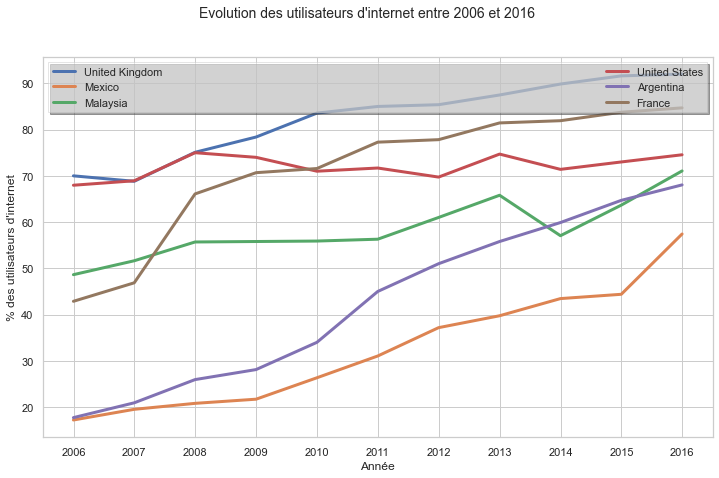

In [128]:
fig = plt.figure(figsize=(12, 7))
fig.suptitle("Evolution des utilisateurs d'internet entre 2006 et 2016", fontsize  = 14)
Date_Deb = datetime.strptime('2005-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

United_Kingdom = Internet_Pays[Internet_Pays['Country Code']=='GBR'].loc[:,'2005':'2015']
Mexico = Internet_Pays[Internet_Pays['Country Code']=='MEX'].loc[:,'2005':'2015']
Malaysia = Internet_Pays[Internet_Pays['Country Code']=='MYS'].loc[:,'2005':'2015']
United_States = Internet_Pays[Internet_Pays['Country Code']=='USA'].loc[:,'2005':'2015']
Argentina= Internet_Pays[Internet_Pays['Country Code']=='ARG'].loc[:,'2005':'2015']
France= Internet_Pays[Internet_Pays['Country Code']=='FRA'].loc[:,'2005':'2015']

plt.plot(annees_ref,United_Kingdom.T,linewidth = 3.0, label='United Kingdom')
plt.plot(annees_ref,Mexico.T,linewidth = 3.0, label='Mexico')
plt.plot(annees_ref,Malaysia.T,linewidth = 3.0, label='Malaysia')
plt.plot(annees_ref,United_States.T,linewidth = 3.0, label='United States')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')
plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')

plt.xlabel('Année')
plt.ylabel('% des utilisateurs d\'internet')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Une dynamique haussière du % de la population qui utilise internet pour l'ensemble des pays choisis qui vari entre 60 et 90% en 2016.

#### L'indicateur % des dépenses du gouvernement pour l'éducation

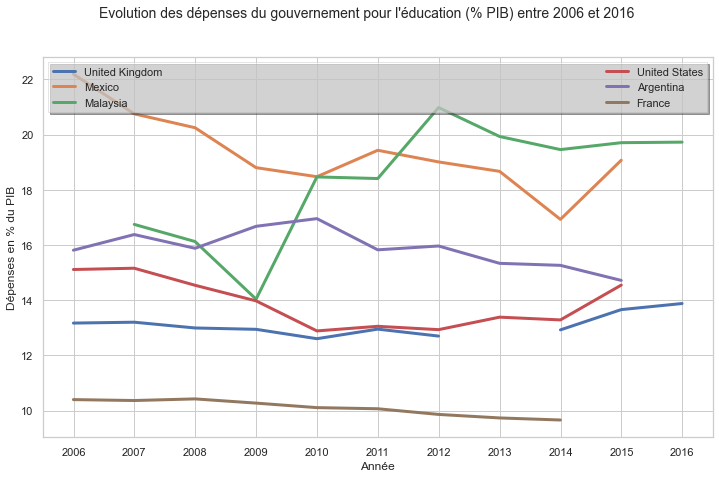

In [129]:
fig = plt.figure(figsize=(12, 7))
fig.suptitle("Evolution des dépenses du gouvernement pour l'éducation (% PIB) entre 2006 et 2016", fontsize  = 14)
Date_Deb = datetime.strptime('2005-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

United_Kingdom = gvrt_exp_educ_Pays[gvrt_exp_educ_Pays['Country Code']=='GBR'].loc[:,'2005':'2015']
Mexico = gvrt_exp_educ_Pays[gvrt_exp_educ_Pays['Country Code']=='MEX'].loc[:,'2005':'2015']
Malaysia = gvrt_exp_educ_Pays[gvrt_exp_educ_Pays['Country Code']=='MYS'].loc[:,'2005':'2015']
United_States = gvrt_exp_educ_Pays[gvrt_exp_educ_Pays['Country Code']=='USA'].loc[:,'2005':'2015']
Argentina= gvrt_exp_educ_Pays[gvrt_exp_educ_Pays['Country Code']=='ARG'].loc[:,'2005':'2015']
France= gvrt_exp_educ_Pays[gvrt_exp_educ_Pays['Country Code']=='FRA'].loc[:,'2005':'2015']

plt.plot(annees_ref,United_Kingdom.T,linewidth = 3.0, label='United Kingdom')
plt.plot(annees_ref,Mexico.T,linewidth = 3.0, label='Mexico')
plt.plot(annees_ref,Malaysia.T,linewidth = 3.0, label='Malaysia')
plt.plot(annees_ref,United_States.T,linewidth = 3.0, label='United States')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')
plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')

plt.xlabel('Année')
plt.ylabel('Dépenses en % du PIB')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Le Mexique a baissé ses dépenses pour l'éducation, tandis que la Malisie les a sensiblement augmentés. les autres pays ont une politique stable en ce qui concèrne les dépenses pour l'éducation.

Pour mieux comprendre ces chiffres, nous allons comparer en $ les dépenses de ces pays:

In [113]:
#indicateur PIB en $:
GDP = recup_indicateur(Data, 'Pays' ,'GDP at market prices (current US$)')

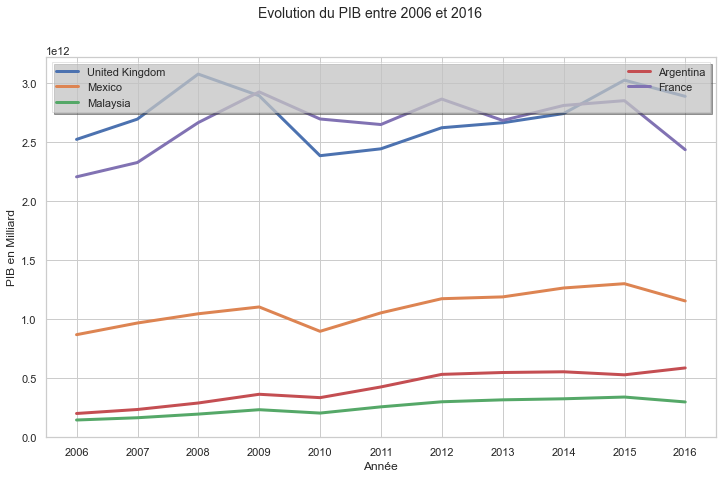

In [130]:
fig = plt.figure(figsize=(12, 7))
fig.suptitle("Evolution du PIB entre 2006 et 2016", fontsize  = 14)
Date_Deb = datetime.strptime('2005-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

United_Kingdom = GDP[GDP['Country Code']=='GBR'].loc[:,'2005':'2015']
Mexico = GDP[GDP['Country Code']=='MEX'].loc[:,'2005':'2015']
Malaysia = GDP[GDP['Country Code']=='MYS'].loc[:,'2005':'2015']
United_States = GDP[GDP['Country Code']=='USA'].loc[:,'2005':'2015']
Argentina= GDP[GDP['Country Code']=='ARG'].loc[:,'2005':'2015']
France= GDP[GDP['Country Code']=='FRA'].loc[:,'2005':'2015']

plt.plot(annees_ref,United_Kingdom.T,linewidth = 3.0, label='United Kingdom')
plt.plot(annees_ref,Mexico.T,linewidth = 3.0, label='Mexico')
plt.plot(annees_ref,Malaysia.T,linewidth = 3.0, label='Malaysia')
#plt.plot(annees_ref,United_States.T,linewidth = 3.0, label='United States')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')
plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')

plt.xlabel('Année')
plt.ylabel('PIB en Milliard')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Le PIB des états unies est très élevé par rapport aux autres pays, sur le graphe one ne voit pas clairement les autres PIB, nous allons faire un graphe sans USA

Les PIB de la France et l'angletterre sont supérrieurs aux PIB des autres pays

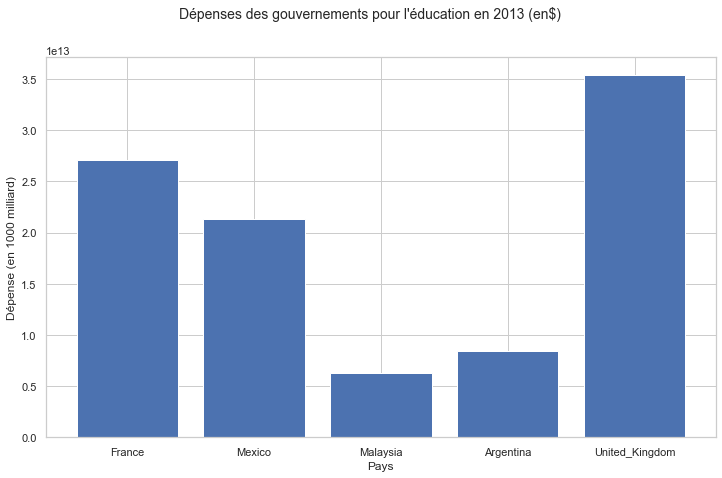

In [115]:
#l'année la plus récente ou on a des données pour tous les pays est 2013,
#nous allons comparer les dépenses pour cette année:
fig = plt.figure(figsize=(12, 7))
fig.suptitle("Dépenses des gouvernements pour l'éducation en 2013 (en$)", fontsize  = 14)

France=(GDP[GDP['Country Code']=='FRA']['2013'].values)*(gvrt_exp_educ_Pays[gvrt_exp_educ_Pays['Country Code']=='FRA']['2013'])
Mexico=(GDP[GDP['Country Code']=='MEX']['2013'].values)*(gvrt_exp_educ_Pays[gvrt_exp_educ_Pays['Country Code']=='MEX']['2013'])
Malaysia=(GDP[GDP['Country Code']=='MYS']['2013'].values)*(gvrt_exp_educ_Pays[gvrt_exp_educ_Pays['Country Code']=='MYS']['2013'])
Argentina=(GDP[GDP['Country Code']=='ARG']['2013'].values)*(gvrt_exp_educ_Pays[gvrt_exp_educ_Pays['Country Code']=='ARG']['2013'])
United_States=(GDP[GDP['Country Code']=='USA']['2013'].values)*(gvrt_exp_educ_Pays[gvrt_exp_educ_Pays['Country Code']=='USA']['2013'])
United_Kingdom=(GDP[GDP['Country Code']=='GBR']['2013'].values)*(gvrt_exp_educ_Pays[gvrt_exp_educ_Pays['Country Code']=='GBR']['2013'])
labels=['France','Mexico','Malaysia','Argentina','United_Kingdom']
x=[France,Mexico,Malaysia,Argentina,United_Kingdom]

plt.xlabel('Pays')
plt.ylabel('Dépense (en 1000 milliard)')

plt.bar(labels,list(map(float, x)))
plt.show()

La malaisie qui dépense le plus en % du PIB est le pays qui dépense le moins en valeur réelle.

#### L'indicateur projection du PIB /habitant

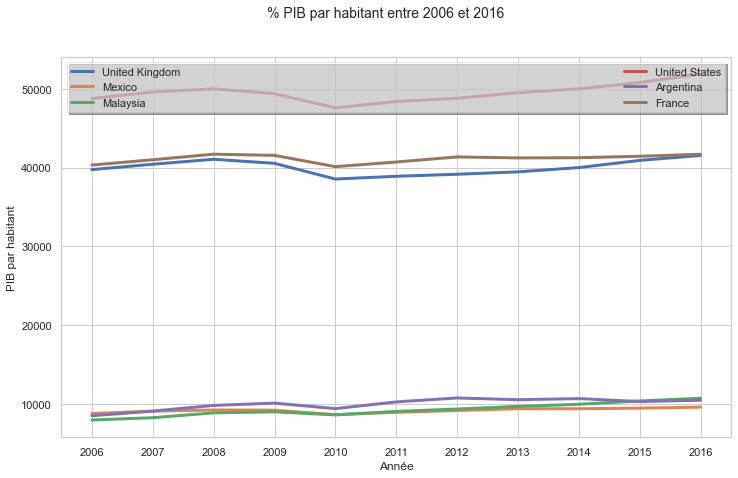

In [116]:
fig = plt.figure(figsize=(12, 7))
fig.suptitle("% PIB par habitant entre 2006 et 2016", fontsize  = 14)
Date_Deb = datetime.strptime('2005-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

United_Kingdom = gdp_per_capita_pays[gdp_per_capita_pays['Country Code']=='GBR'].loc[:,'2005':'2015']
Mexico = gdp_per_capita_pays[gdp_per_capita_pays['Country Code']=='MEX'].loc[:,'2005':'2015']
Malaysia = gdp_per_capita_pays[gdp_per_capita_pays['Country Code']=='MYS'].loc[:,'2005':'2015']
United_States = gdp_per_capita_pays[gdp_per_capita_pays['Country Code']=='USA'].loc[:,'2005':'2015']
Argentina= gdp_per_capita_pays[gdp_per_capita_pays['Country Code']=='ARG'].loc[:,'2005':'2015']
France= gdp_per_capita_pays[gdp_per_capita_pays['Country Code']=='FRA'].loc[:,'2005':'2015']

plt.plot(annees_ref,United_Kingdom.T,linewidth = 3.0, label='United Kingdom')
plt.plot(annees_ref,Mexico.T,linewidth = 3.0, label='Mexico')
plt.plot(annees_ref,Malaysia.T,linewidth = 3.0, label='Malaysia')
plt.plot(annees_ref,United_States.T,linewidth = 3.0, label='United States')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')
plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')

plt.xlabel('Année')
plt.ylabel('PIB par habitant')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

A part les Etats Unis, qui ont un PIB par habitant superieur à la France est l'Angleterre qui a un PIB par habittant similaire, les autres pays ont un niveau plus inférieur. 

#### L'indicateur % des personnes qui ont un PC personnel

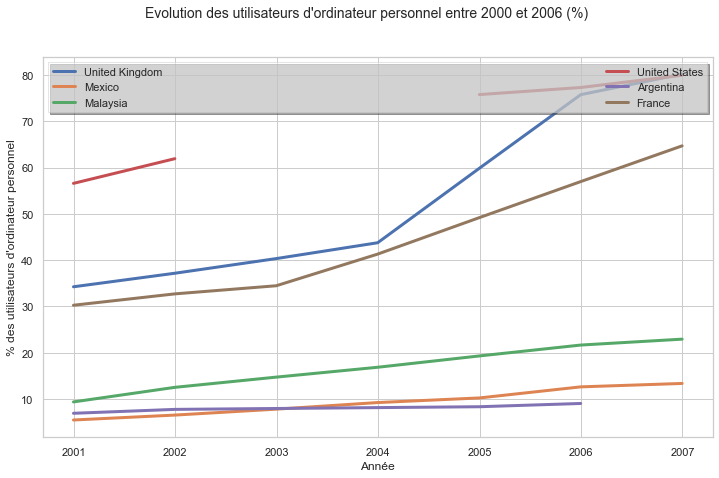

In [117]:
fig = plt.figure(figsize=(12, 7))
fig.suptitle("Evolution des utilisateurs d'ordinateur personnel entre 2000 et 2006 (%)", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2006-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

United_Kingdom = Personal_computers_Pays[Personal_computers_Pays['Country Code']=='GBR'].loc[:,'2000':'2006']
Mexico = Personal_computers_Pays[Personal_computers_Pays['Country Code']=='MEX'].loc[:,'2000':'2006']
Malaysia = Personal_computers_Pays[Personal_computers_Pays['Country Code']=='MYS'].loc[:,'2000':'2006']
United_States = Personal_computers_Pays[Personal_computers_Pays['Country Code']=='USA'].loc[:,'2000':'2006']
Argentina= Personal_computers_Pays[Personal_computers_Pays['Country Code']=='ARG'].loc[:,'2000':'2006']
France= Personal_computers_Pays[Personal_computers_Pays['Country Code']=='FRA'].loc[:,'2000':'2006']

plt.plot(annees_ref,United_Kingdom.T,linewidth = 3.0, label='United Kingdom')
plt.plot(annees_ref,Mexico.T,linewidth = 3.0, label='Mexico')
plt.plot(annees_ref,Malaysia.T,linewidth = 3.0, label='Malaysia')
plt.plot(annees_ref,United_States.T,linewidth = 3.0, label='United States')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')
plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')

plt.xlabel('Année')
plt.ylabel('% des utilisateurs d\'ordinateur personnel')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Une augmontation du pourcentage des personnes qui ont un ordinateur personnel pour tous les pays sauf l'argentine qui a une dynamique plus lente

#### L'indicateur Nombre de client potentiel

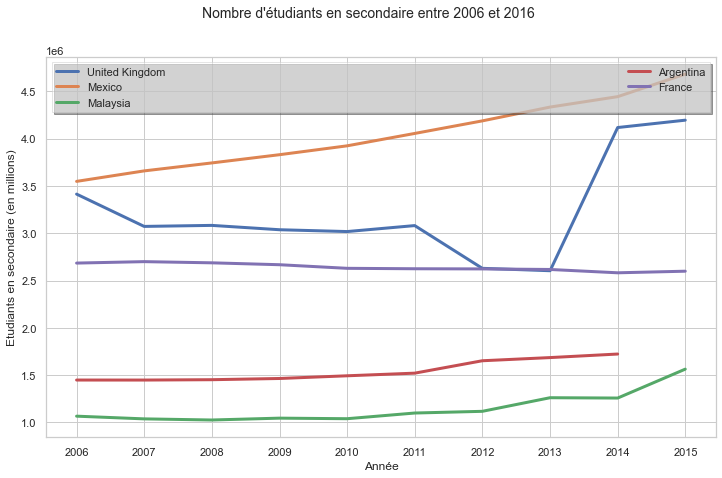

In [131]:
fig = plt.figure(figsize=(12, 7))
fig.suptitle("Nombre d'étudiants en secondaire entre 2006 et 2016 ", fontsize  = 14)
Date_Deb = datetime.strptime('2005-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2014-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')


United_Kingdom = eleves_secondaire_pays[eleves_secondaire_pays['Country Code']=='GBR'].loc[:,'2005':'2014']
Mexico = eleves_secondaire_pays[eleves_secondaire_pays['Country Code']=='MEX'].loc[:,'2005':'2014']
Malaysia = eleves_secondaire_pays[eleves_secondaire_pays['Country Code']=='MYS'].loc[:,'2005':'2014']
United_States = eleves_secondaire_pays[eleves_secondaire_pays['Country Code']=='USA'].loc[:,'2005':'2014']
Argentina= eleves_secondaire_pays[eleves_secondaire_pays['Country Code']=='ARG'].loc[:,'2005':'2014']
France= eleves_secondaire_pays[eleves_secondaire_pays['Country Code']=='FRA'].loc[:,'2005':'2014']

plt.plot(annees_ref,United_Kingdom.T,linewidth = 3.0, label='United Kingdom')
plt.plot(annees_ref,Mexico.T,linewidth = 3.0, label='Mexico')
plt.plot(annees_ref,Malaysia.T,linewidth = 3.0, label='Malaysia')
#plt.plot(annees_ref,United_States.T,linewidth = 3.0, label='United States')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')
plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')

plt.xlabel('Année')
plt.ylabel('Etudiants en secondaire (en millions)')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

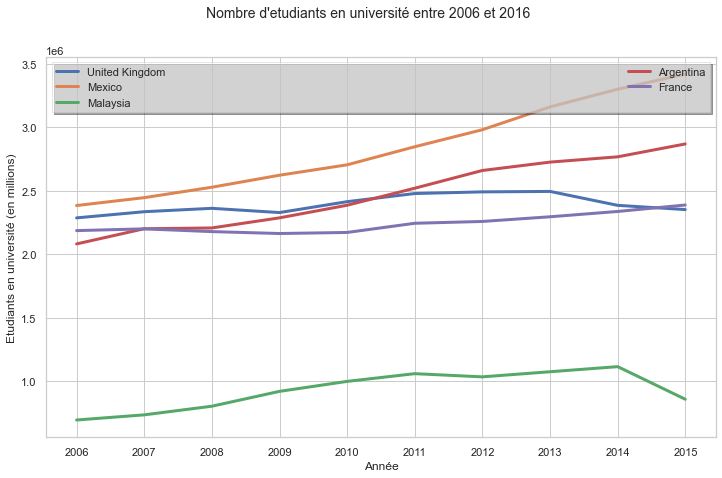

In [132]:
fig = plt.figure(figsize=(12, 7))
fig.suptitle("Nombre d'etudiants en université entre 2006 et 2016 ", fontsize  = 14)
Date_Deb = datetime.strptime('2005-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2014-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')


United_Kingdom = eleves_univ_pays[eleves_univ_pays['Country Code']=='GBR'].loc[:,'2005':'2014']
Mexico = eleves_univ_pays[eleves_univ_pays['Country Code']=='MEX'].loc[:,'2005':'2014']
Malaysia = eleves_univ_pays[eleves_univ_pays['Country Code']=='MYS'].loc[:,'2005':'2014']
United_States = eleves_univ_pays[eleves_univ_pays['Country Code']=='USA'].loc[:,'2005':'2014']
Argentina= eleves_univ_pays[eleves_univ_pays['Country Code']=='ARG'].loc[:,'2005':'2014']
France= eleves_univ_pays[eleves_univ_pays['Country Code']=='FRA'].loc[:,'2005':'2014']

plt.plot(annees_ref,United_Kingdom.T,linewidth = 3.0, label='United Kingdom')
plt.plot(annees_ref,Mexico.T,linewidth = 3.0, label='Mexico')
plt.plot(annees_ref,Malaysia.T,linewidth = 3.0, label='Malaysia')
#plt.plot(annees_ref,United_States.T,linewidth = 3.0, label='United States')
plt.plot(annees_ref,Argentina.T,linewidth = 3.0, label='Argentina')
plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')

plt.xlabel('Année')
plt.ylabel('Etudiants en université (en millions)')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Le nombre d'étudiants en lycée et université suit une dynamique haussière entre 2006 et 2015 pour tous les pays choisi.

(nous avons enlevé la courbe des états unies car elle écrase l'évolution des autres courbe vu son importance) 

##### Alternative:
Si on prend on compte que les indicateurs nombre d'utilisateurs d'utilisateurs d'internet,nombre des clients potentiel et les dépenses de l'état pour l'éducation:

In [120]:
Rang_1 = rang_clientspotentiel.merge(rang_internetUser, how ="outer", on = "Country Name")
Rang_1 = Rang_1.merge(rang_gvrtDepenseEduc, how ="outer", on = "Country Name")

In [121]:
Rang_1["Rang_Total"] = Rang_1['Rang_Client potentiel']+Rang_1['Rang_UserInternet']+Rang_1['Rang_DepensegvrtEduc']
Rang_1.sort_values(by='Rang_Total', ascending=True, inplace=True)
Rang_1[['Country Name','Rang_Total']].head()

Country Name  Rang_Total
8   United Kingdom       103.0
5           Mexico       111.0
2    United States       114.0
19        Malaysia       123.0
6            Japan       132.0

La liste des pays peut changer selon le choix des indicateurs et le poids que nous donnons à ces dérniers.

### Conclusion:

###### Jeu de données:

le jeu de données présente beaucoup d'avantages qui aident à mener à bien cette étude pour une première présélection des pays à fort potentiel pour le projet d'expansion à l'international d'Academy. mais il a aussi des limites.

Avantages:

    Données cohérentes et utilisables
    Un très large choix d'indicateurs
    Couvre tous les aspects liés à l'éducation
    Présente des données d'ordre démographique et financière
    Couvre la totalité des pays du monde
    
Limites:

    Beaucoup de données manquantes
    Absence des données sur l'importance des diplômes privés sur le marché du travail
    Absence des données sur le e-learning (la concurrence): Pour avoir une vision plus claire sur le marché dans les pays sélectionnés, nous avons besoin d'une étude sur la concurence. En effet, parmi les pays séléctionnés on retrouve les états unies ou encore l'Angleterre qui ont une offre tèrs large de lycées et universités pour toutes les déciplines ainsi que plusieurs offres du e-learning. 
    
######  La metrique:

Cette metrique très simplifiée permet d'effectuer une prmière présélection des pays en se basant sur les 6 indicateurs que nous avons défini. Par contre cette manière de classer les pays nous donne un calssement différent avec chaque changement d'indicateur (si on décide de garder un seul des indicateurs corrélés nous obtenons une liste de pays dirrérente)

